In [1]:
%tensorflow_version 2.x
import tensorflow as tf
tf.__version__

'2.7.0'

In [2]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import warnings # to ignore warnings
warnings.filterwarnings('ignore')
import random, re

from sklearn.preprocessing import LabelEncoder
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer
from gensim.models import Word2Vec

from sklearn.metrics import accuracy_score, f1_score, confusion_matrix, recall_score, precision_score, roc_auc_score
from sklearn.metrics import classification_report

from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, BaggingClassifier, AdaBoostClassifier, GradientBoostingClassifier
from xgboost import XGBClassifier

# cross-validation methods
from sklearn.model_selection import KFold
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV

# pre-processing methods
from sklearn.preprocessing import StandardScaler

# Deep learning libraries
from tensorflow import keras
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Flatten, Dense, Activation
from tensorflow.keras import regularizers, optimizers
from sklearn.metrics import r2_score
from tensorflow.keras.models import load_model
from tensorflow.keras.layers import BatchNormalization

from keras.utils import np_utils
from keras.layers import Input
# from keras.optimizers import SGD
from tensorflow.keras.models import Sequential
from tensorflow.keras import optimizers
from keras.models import Model
from keras.layers.merge import Concatenate
from tensorflow.keras.layers import Flatten, Activation, Dense, LSTM, BatchNormalization, Embedding, Dropout, Flatten, Bidirectional, GlobalMaxPool1D
from keras.models import model_from_json
from keras.regularizers import l1, l2, l1_l2
from keras.constraints import maxnorm, min_max_norm
from keras.constraints import unit_norm
from keras.callbacks import ReduceLROnPlateau
from keras.callbacks import EarlyStopping
from keras.callbacks import ModelCheckpoint
from keras.models import model_from_json


from keras.models import load_model
from keras.wrappers.scikit_learn import KerasClassifier

# Keras pre-processing
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences

import nltk
from nltk.util import ngrams
nltk.download('vader_lexicon')
nltk.download('stopwords')

[nltk_data] Downloading package vader_lexicon to /root/nltk_data...
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

In [3]:
from google.colab import drive
drive.mount('/content/drive/')

Mounted at /content/drive/


In [4]:
import os
projectPath='/content/drive/MyDrive/Projects/ProjectFiles/'
os.chdir(projectPath)

In [5]:
ls -la

total 3050750
-rw------- 1 root root     193631 Nov 15 09:04 'Data Set - industrial_safety_and_health_database_with_accidents_description.csv'
-rw------- 1 root root     419672 Dec 15 10:06  finalized_keras_model.h5
-rw------- 1 root root  347116733 Dec  9 16:36  glove.6B.100d.txt
-rw------- 1 root root  693432828 Dec  9 16:37  glove.6B.200d.txt
-rw------- 1 root root 1037962819 Dec  9 16:37  glove.6B.300d.txt
-rw------- 1 root root  171350079 Dec  9 16:36  glove.6B.50d.txt
-rw------- 1 root root  862182613 Oct 25  2015  glove.6B.zip
-rw------- 1 root root     193631 Nov 15 09:03  IHMStefanini_industrial_safety_and_health_database_with_accidents_description.csv
-rw------- 1 root root     838560 Dec 10 12:19  model_adm_relu.h5
-rw------- 1 root root      51668 Dec 28 13:21  model.bin
-rw------- 1 root root     143592 Dec 15 10:06  model.h5
-rw------- 1 root root       2415 Dec 15 10:06  model.json
-rw------- 1 root root    5398040 Dec 28 13:38  model_lstm.h5
-rw------- 1 root root    38

### Import Dataset

In [6]:
industry_data = pd.read_csv('IHMStefanini_industrial_safety_and_health_database_with_accidents_description.csv')

In [7]:
display(industry_data.head())

Unnamed: 0  ...                                        Description
0           0  ...  While removing the drill rod of the Jumbo 08 f...
1           1  ...  During the activation of a sodium sulphide pum...
2           2  ...  In the sub-station MILPO located at level +170...
3           3  ...  Being 9:45 am. approximately in the Nv. 1880 C...
4           4  ...  Approximately at 11:45 a.m. in circumstances t...

[5 rows x 11 columns]

In [8]:
### Shapae of the Data set
industry_data.shape

(425, 11)

There are 425 rows and 11 columns

In [9]:
industry_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 425 entries, 0 to 424
Data columns (total 11 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   Unnamed: 0                425 non-null    int64 
 1   Data                      425 non-null    object
 2   Countries                 425 non-null    object
 3   Local                     425 non-null    object
 4   Industry Sector           425 non-null    object
 5   Accident Level            425 non-null    object
 6   Potential Accident Level  425 non-null    object
 7   Genre                     425 non-null    object
 8   Employee or Third Party   425 non-null    object
 9   Critical Risk             425 non-null    object
 10  Description               425 non-null    object
dtypes: int64(1), object(10)
memory usage: 36.6+ KB


- Except the first column all other columns are object Data type
- Except the Data column all other columns are Categorical columns

### Data Cleansing

Check for null values

In [10]:
industry_data.isna().sum()

Unnamed: 0                  0
Data                        0
Countries                   0
Local                       0
Industry Sector             0
Accident Level              0
Potential Accident Level    0
Genre                       0
Employee or Third Party     0
Critical Risk               0
Description                 0
dtype: int64

> - There are no null values in the dataset

Check for Duplicates

In [11]:
industry_data.duplicated().sum()

0

> - There are 7 duplicates in the dataset

In [12]:
industry_data.drop_duplicates(inplace=True)

Removing and renaming of Columns

In [13]:
#Dropping the column 'unnamed'
industry_data.drop(columns=('Unnamed: 0'),inplace=True,axis=1)

#Renaming the column names
industry_data.rename(columns={'Data': 'Date','Countries':'Country', 'Genre':'Gender', 'Employee or Third Party':'Employee type'}, inplace=True)

In [14]:
industry_data.head(5)

Date  ...                                        Description
0  2016-01-01 00:00:00  ...  While removing the drill rod of the Jumbo 08 f...
1  2016-01-02 00:00:00  ...  During the activation of a sodium sulphide pum...
2  2016-01-06 00:00:00  ...  In the sub-station MILPO located at level +170...
3  2016-01-08 00:00:00  ...  Being 9:45 am. approximately in the Nv. 1880 C...
4  2016-01-10 00:00:00  ...  Approximately at 11:45 a.m. in circumstances t...

[5 rows x 10 columns]

In [15]:
industry_data['Description'][2]

'In the sub-station MILPO located at level +170 when the collaborator was doing the excavation work with a pick (hand tool), hitting a rock with the flat part of the beak, it bounces off hitting the steel tip of the safety shoe and then the metatarsal area of \u200b\u200bthe left foot of the collaborator causing the injury.'

Check Outliers


As we have most of the columns as categorical in the dataset, we dnt have detect outliers for the Categorical variables. So lets check unique and frequency of each variable

In [16]:
for x in industry_data.columns:
    if x != 'Description':
      print('--'*25); print(f'Unique values of "{x}" column'); print('--'*25)
      print(industry_data[x].unique())
      print('\n')

--------------------------------------------------
Unique values of "Date" column
--------------------------------------------------
['2016-01-01 00:00:00' '2016-01-02 00:00:00' '2016-01-06 00:00:00'
 '2016-01-08 00:00:00' '2016-01-10 00:00:00' '2016-01-12 00:00:00'
 '2016-01-16 00:00:00' '2016-01-17 00:00:00' '2016-01-19 00:00:00'
 '2016-01-26 00:00:00' '2016-01-28 00:00:00' '2016-01-30 00:00:00'
 '2016-02-01 00:00:00' '2016-02-02 00:00:00' '2016-02-04 00:00:00'
 '2016-02-06 00:00:00' '2016-02-07 00:00:00' '2016-02-08 00:00:00'
 '2016-02-21 00:00:00' '2016-02-25 00:00:00' '2016-02-09 00:00:00'
 '2016-02-10 00:00:00' '2016-02-15 00:00:00' '2016-02-14 00:00:00'
 '2016-02-13 00:00:00' '2016-02-16 00:00:00' '2016-02-17 00:00:00'
 '2016-02-19 00:00:00' '2016-02-20 00:00:00' '2016-02-18 00:00:00'
 '2016-02-22 00:00:00' '2016-02-24 00:00:00' '2016-02-29 00:00:00'
 '2016-02-26 00:00:00' '2016-02-27 00:00:00' '2016-03-02 00:00:00'
 '2016-03-03 00:00:00' '2016-03-04 00:00:00' '2016-03-05 00:00:

As we can see from the above data, there are no outliers in the columns. The data are unique and categorical. For example, Gender types in the provided data so there are no outliers in 'Gender' column. There are only six Potential Accident Level types so there are no outliers in 'Potential Accident Level' column.

### Data Pre-processing and Analysis

To better understand the data, I am extracting the day, month and year from Date column and creating new features such as weekday, weekofyear.

In [17]:
industry_data['Date'] = pd.to_datetime(industry_data['Date'])

industry_data['Year'] = industry_data.Date.apply(lambda x : x.year)
industry_data['Month'] = industry_data.Date.apply(lambda x : x.month)
industry_data['Day'] = industry_data.Date.apply(lambda x : x.day)
industry_data['Weekday'] = industry_data.Date.apply(lambda x : x.day_name())
industry_data['WeekofYear'] = industry_data.Date.apply(lambda x : x.weekofyear)

industry_data.head()

Date     Country     Local  ... Day    Weekday WeekofYear
0 2016-01-01  Country_01  Local_01  ...   1     Friday         53
1 2016-01-02  Country_02  Local_02  ...   2   Saturday         53
2 2016-01-06  Country_01  Local_03  ...   6  Wednesday          1
3 2016-01-08  Country_01  Local_04  ...   8     Friday          1
4 2016-01-10  Country_01  Local_04  ...  10     Sunday          1

[5 rows x 15 columns]

As the dataset is from Brazil, we will create seasonal vairables based on the month to check which season the more accidents occurs

In [18]:
def month2seasons(x):
    if x in [9, 10, 11]:
        season = 'Spring'
    elif x in [12, 1, 2]:
        season = 'Summer'
    elif x in [3, 4, 5]:
        season = 'Autumn'
    elif x in [6, 7, 8]:
        season = 'Winter'
    return season

In [19]:
industry_data['Season'] = industry_data['Month'].apply(month2seasons)
industry_data.head(5)

Date     Country     Local  ...    Weekday WeekofYear  Season
0 2016-01-01  Country_01  Local_01  ...     Friday         53  Summer
1 2016-01-02  Country_02  Local_02  ...   Saturday         53  Summer
2 2016-01-06  Country_01  Local_03  ...  Wednesday          1  Summer
3 2016-01-08  Country_01  Local_04  ...     Friday          1  Summer
4 2016-01-10  Country_01  Local_04  ...     Sunday          1  Summer

[5 rows x 16 columns]

### Visualization

#### Univariate Analysis

In [20]:
# Creating a function to make univariate plots for analysis
def plot(col, title):

    value = industry_data[col].value_counts()[1]
    plt.figure(figsize = (15,12))
    plt.subplot(2,2,1)
    sns.countplot(industry_data[col], order=industry_data[col].value_counts().index, alpha = 1.0, saturation=1);
    # sns.lineplot(industry_data[col].value_counts().index, industry_data[col].value_counts().values, palette='seismic')
    plt.title(title);

    plt.subplot(2,2,2)
    # colors = ['yellowgreen', 'violet', 'orange', 'grey', 'cyan']

    plt.pie(industry_data[col].value_counts(), autopct = "%.2f",
       labels = industry_data[col].value_counts().index , shadow = True, explode = [0.1]*len(industry_data[col].value_counts().index));
    plt.title(title);
    plt.show()

Country

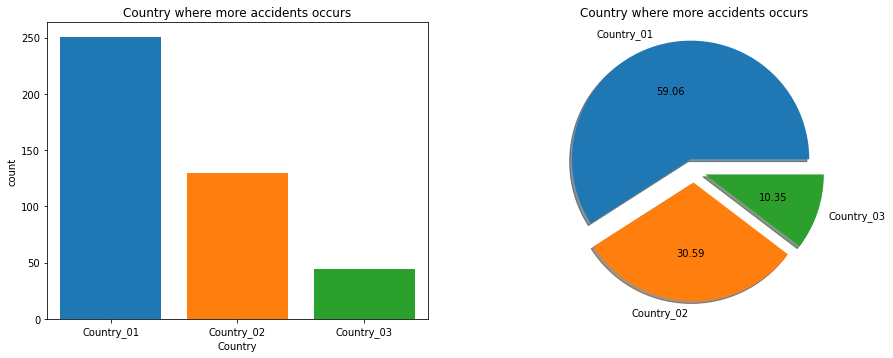

In [21]:
plot('Country','Country where more accidents occurs')

- Country 1 has faced more accidents compared with other countries

Industry Sector

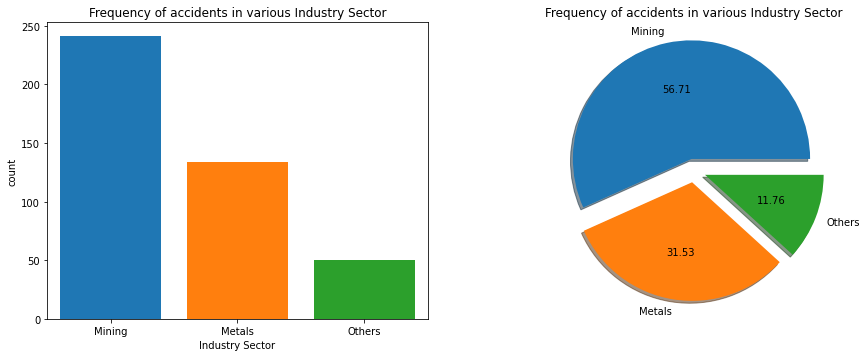

In [22]:
# Frequency of accidents in various Industry Sector
plot('Industry Sector','Frequency of accidents in various Industry Sector')

- mining industries witness more accidents.
- We can say that the number of accidents in Mining Industry is considerably more than that in the Metal Industry, therefore mining job is more risky than the latter.

Employee type

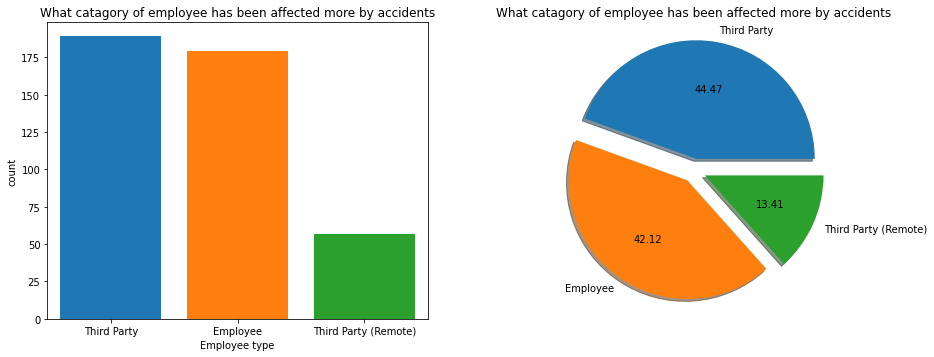

In [23]:
### Category of employee affected by the accidents
plot('Employee type','What catagory of employee has been affected more by accidents')

- The large number of Third Party employee type indicates the difference of employement system in gender or industry sector.

Gender

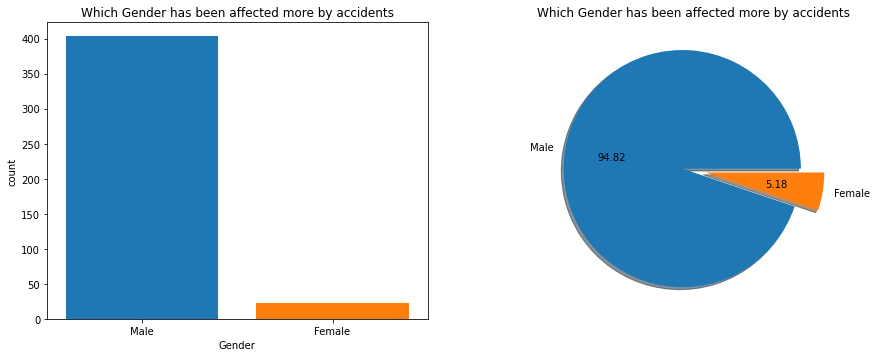

In [24]:
plot('Gender', 'Which Gender has been affected more by accidents')

Accident Level

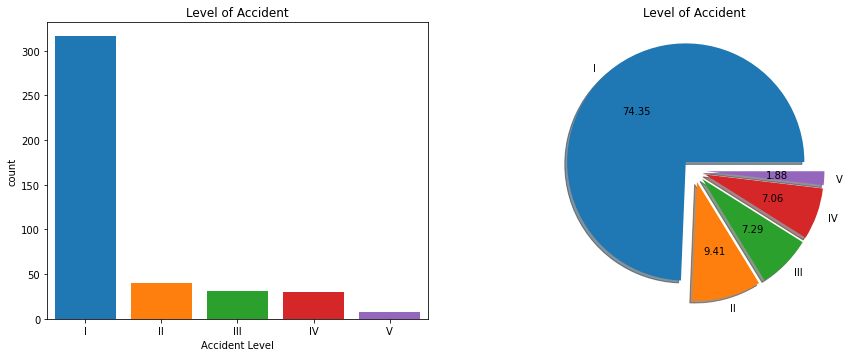

In [25]:
plot('Accident Level', 'Level of Accident')

- Level I signifies not severe and V signifies very severe.
- Accidents with the level I are most common. These are due to small misses, like people forgot their PPE, or they dropped a tool, etc.

Potential Accident Level

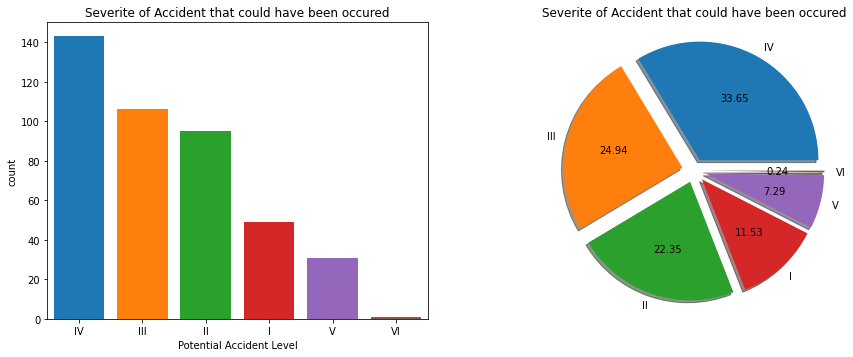

In [26]:
plot('Potential Accident Level', 'Severite of Accident that could have been occured')

- Potential accident level indicates how severe the accident would been due to other factors involved in the accidents.
- Potential accident level IV has the highest count and signifies the moderate severity of accidents.
- We have to check the correlation of this Potential Accident level and Accident level along with the industry sector.

Local

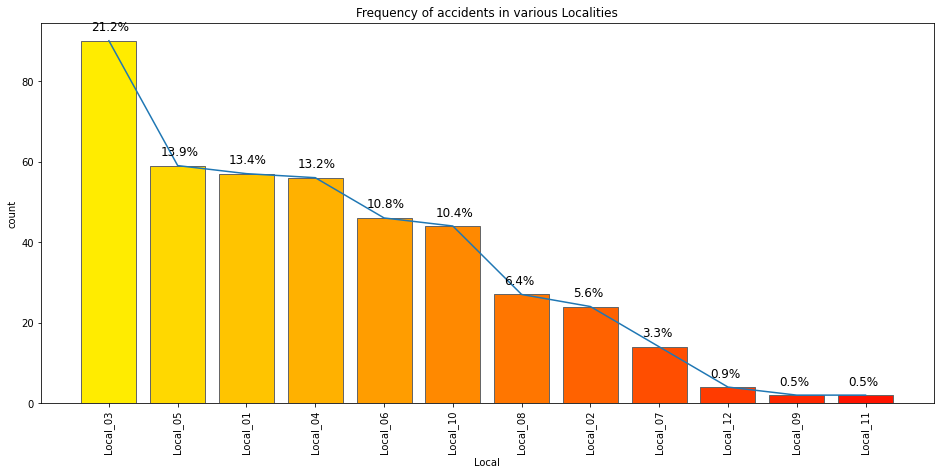

In [27]:
# Locals Count
plt.figure(figsize = (16,7))
ax = sns.countplot(x = industry_data['Local'], order=industry_data['Local'].value_counts().index, palette = 'autumn_r', edgecolor='.4', saturation=1);
sns.lineplot(industry_data['Local'].value_counts().index, industry_data['Local'].value_counts().values)

plt.title('Frequency of accidents in various Localities');
plt.xticks(rotation = 'vertical');

total = sum(industry_data['Local'].value_counts())
for p in ax.patches:
    ax.annotate('{:.1f}%'.format(100*p.get_height()/total), 
                (p.get_x(), p.get_height()),
                 size=12,
                 xytext = (10, 10), 
                 textcoords = 'offset points')

- Local_03 has recorded maximum number of accidents which is 21.2% of all the localities in the country.
- This is followed by Local-05, Local-01 and so on.

Critical Risk

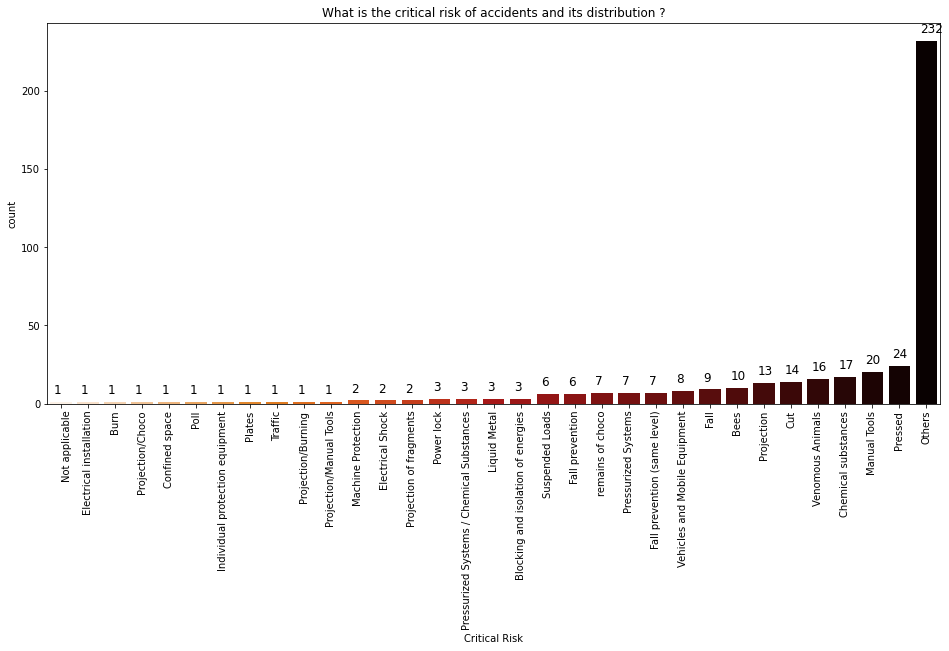

In [28]:
# Critical Risk Count
plt.figure(figsize = (16,7))
ax = sns.countplot(x = industry_data['Critical Risk'], order=industry_data['Critical Risk'].value_counts().sort_values(ascending = True).index, palette = 'gist_heat_r');
plt.title('What is the critical risk of accidents and its distribution ?');
plt.xticks(rotation = 'vertical');

total = sum(industry_data['Critical Risk'].value_counts())
for p in ax.patches:
    ax.annotate('{}'.format(p.get_height()), 
                (p.get_x(), p.get_height()),
                 size=12,
                 xytext = (4, 8), 
                 textcoords = 'offset points')

- Because most part of the Critical Risks are classified as 'Others', it is thought that there are too many risks to classify precisely
- And it is also thought that it takes so many time to analyze risks and reasons why the accidents occur.

Season

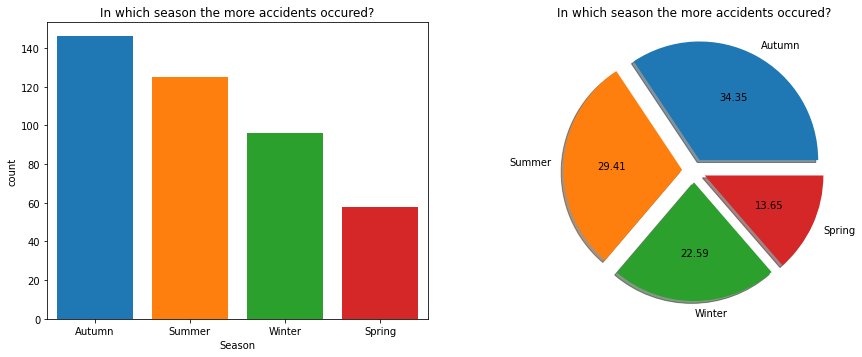

In [29]:
plot('Season', 'In which season the more accidents occured?')

- The number of accidents increased in Summer and Autumn.
- It is thought that the occurrence of accidents is related to the climate(especially tempeature).

Calendar

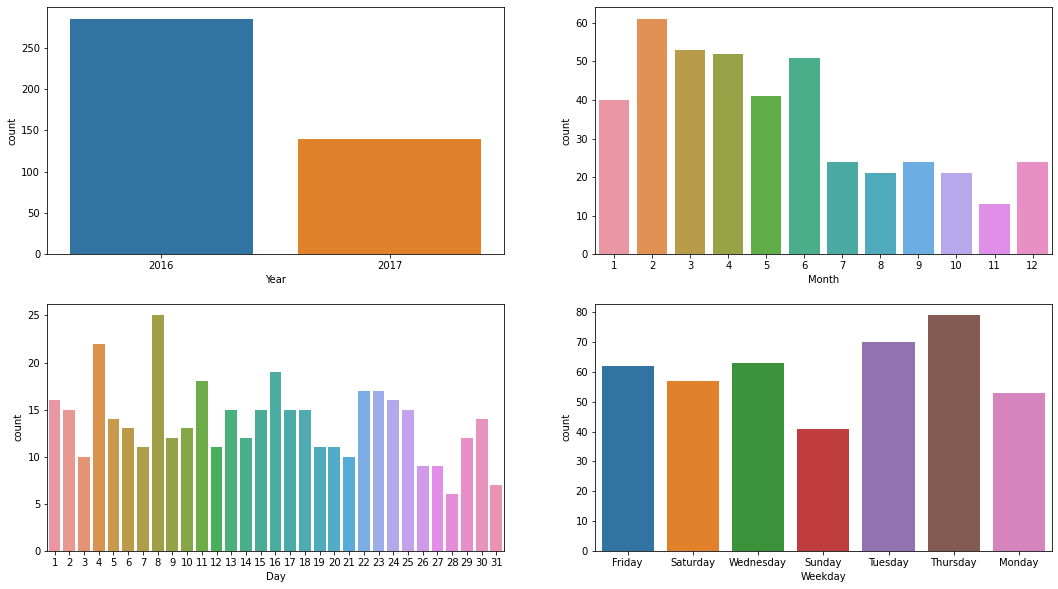

In [30]:
  # print(col,i+1)
fig,ax = plt.subplots(2, 2, figsize=(18, 10))
sns.countplot(industry_data['Year'], ax=ax[0,0])
sns.countplot(industry_data['Month'], ax=ax[0,1])
sns.countplot(industry_data['Day'], ax=ax[1,0])
sns.countplot(industry_data['Weekday'], ax=ax[1,1])
fig.show()

- It seems that the number of accidents decreased in latter of the year / month.
- The number of accidents increased during the middle of the week and declined since the middle of the week.

We will analyse description about accidents, which is very important to understand the cause of accidents. So, we will discover the characteristical words or phrases indicating situation when accidents occured.

In [31]:
###function to calculate top 30 ngram under several conditions
def ngram_func(ngram, trg='', trg_value=''):
    #trg_value is list-object
    if (trg == '') or (trg_value == ''):
        string_filterd =  industry_data['Description'].sum().split()
    else:
        string_filterd =  industry_data[industry_data[trg].isin(trg_value)]['Description'].sum().split()
    dic = nltk.FreqDist(nltk.ngrams(string_filterd, ngram)).most_common(30)
    ngram_industry_data = pd.DataFrame(dic, columns=['ngram','count'])
    ngram_industry_data.index = [' '.join(i) for i in ngram_industry_data.ngram]
    ngram_industry_data.drop('ngram',axis=1, inplace=True)
    return ngram_industry_data

In [32]:
import nltk
ngram_func(1)[::-1]

count
At           85
-            87
time         99
for         103
which       104
The         110
employee    113
operator    113
hand        114
it          127
is          128
by          139
right       153
left        154
he          155
from        162
causing     166
when        197
at          210
his         259
with        261
on          286
that        293
was         436
in          475
a           513
and         606
to          671
of         1515
the        4167

Unigram

In [33]:
ngram_func(1)[::-1]

count
At           85
-            87
time         99
for         103
which       104
The         110
employee    113
operator    113
hand        114
it          127
is          128
by          139
right       153
left        154
he          155
from        162
causing     166
when        197
at          210
his         259
with        261
on          286
that        293
was         436
in          475
a           513
and         606
to          671
of         1515
the        4167

Bigram

In [34]:
ngram_func(2)[::-1]

count
his left             37
causing a            38
finger of            40
right hand           40
that was             41
the collaborator     41
against the          43
when the             44
the accident         45
left hand            45
of a                 45
between the          45
by the               50
that the             56
At the               59
the employee         69
causing the          71
time of              73
the time             76
the operator         78
at the               86
the left             91
and the              91
the right            95
from the            114
with the            131
to the              193
on the              207
in the              309
of the              910

Trigram

In [35]:
ngram_func(3)[::-1]

count
of the accident,           15
was in the                 15
in the right               15
of the equipment           15
edge of the                16
support of the             16
the back of                17
end of the                 17
the operator of            17
circumstances that the     17
the support of             17
a height of                18
that moment the            18
one of the                 20
hand against the           20
side of the                20
operator of the            22
the right hand             24
to the medical             24
part of the                24
at the time                25
the left hand              27
the accident the           29
of the right               35
finger of the              37
of the accident            38
of the left                42
At the time                51
time of the                71
the time of                73

Performing the ngrams by excluding the stop words

In [36]:
import re
import unicodedata
import nltk
from nltk.corpus import stopwords
nltk.download('wordnet')
# add appropriate words that will be ignored in the analysis
ADDITIONAL_STOPWORDS = ['covfefe']

import matplotlib.pyplot as plt

[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Unzipping corpora/wordnet.zip.


In [37]:
def basic_clean(text):
  """
  A simple function to clean up the data. All the words that
  are not designated as a stop word is then lemmatized after
  encoding and basic regex parsing are performed.
  """
  wnl = nltk.stem.WordNetLemmatizer()
  stopwords = nltk.corpus.stopwords.words('english') + ADDITIONAL_STOPWORDS
  text = (unicodedata.normalize('NFKD', text)
    .encode('ascii', 'ignore')
    .decode('utf-8', 'ignore')
    .lower())
  words = re.sub(r'[^\w\s]', '', text).split()
  return [wnl.lemmatize(word) for word in words if word not in stopwords]

In [38]:
words = basic_clean(''.join(str(industry_data['Description'].tolist())))

In [39]:
# words[:20]

In [40]:
uni_gram=(pd.Series(nltk.ngrams(words, 1)).value_counts())[:30]
uni_gram

(employee,)        183
(hand,)            181
(causing,)         166
(left,)            160
(right,)           155
(operator,)        133
(activity,)        120
(time,)            112
(injury,)          111
(moment,)          103
(worker,)           87
(collaborator,)     84
(area,)             81
(work,)             80
(one,)              80
(equipment,)        77
(finger,)           76
(assistant,)        75
(accident,)         73
(pipe,)             72
(level,)            71
(hit,)              71
(floor,)            65
(support,)          62
(mesh,)             59
(rock,)             57
(fall,)             56
(mr,)               54
(glove,)            53
(safety,)           53
dtype: int64

In [41]:
bi_gram=(pd.Series(nltk.ngrams(words, 2)).value_counts())[:30]
bi_gram

(left, hand)            70
(right, hand)           57
(time, accident)        56
(causing, injury)       55
(finger, left)          25
(employee, report)      22
(injury, described)     20
(da, silva)             18
(described, injury)     17
(medical, center)       17
(left, foot)            15
(fragment, rock)        15
(injury, time)          15
(hand, causing)         15
(injured, person)       15
(finger, right)         14
(support, mesh)         14
(right, side)           13
(allergic, reaction)    13
(safety, glove)         11
(right, leg)            11
(employee, used)        10
(wearing, safety)       10
(upper, part)           10
(time, event)           10
(made, use)             10
(accident, employee)    10
(right, foot)            9
(left, leg)              9
(ring, finger)           9
dtype: int64

In [42]:
tri_gram=(pd.Series(nltk.ngrams(words, 3)).value_counts())[:30]
tri_gram

(finger, left, hand)               24
(causing, injury, described)       15
(finger, right, hand)              14
(injury, time, accident)           13
(time, accident, employee)          9
(hand, causing, injury)             8
(generating, described, injury)     8
(manoel, da, silva)                 8
(described, time, accident)         7
(time, accident, worker)            6
(right, hand, causing)              6
(4, bite, one)                      6
(took, 4, bite)                     6
(one, hand, glove)                  6
(left, hand, causing)               6
(causing, injury, time)             6
(returned, normal, activity)        5
(back, right, hand)                 5
(silva, attacked, bee)              5
(worker, wearing, safety)           5
(causing, injury, employee)         5
(causing, described, injury)        5
(da, silva, attacked)               5
(left, arm, uniform)                5
(collection, point, another)        4
(generating, injury, time)          4
(time, accid

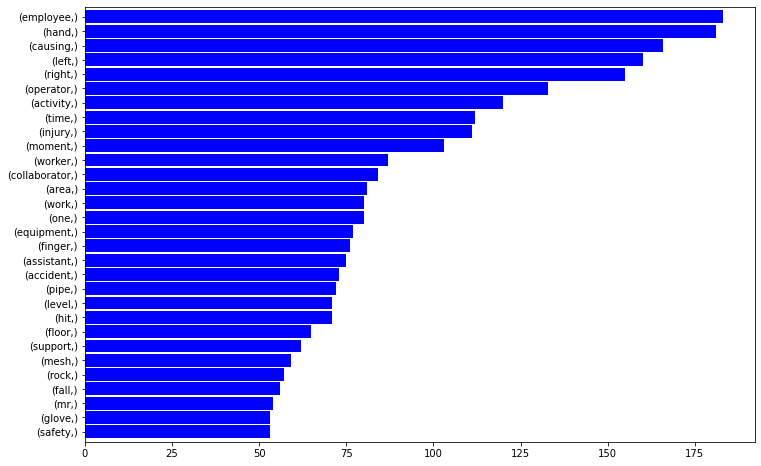

In [43]:
uni_gram.sort_values().plot.barh(color='blue', width=.9, figsize=(12, 8))

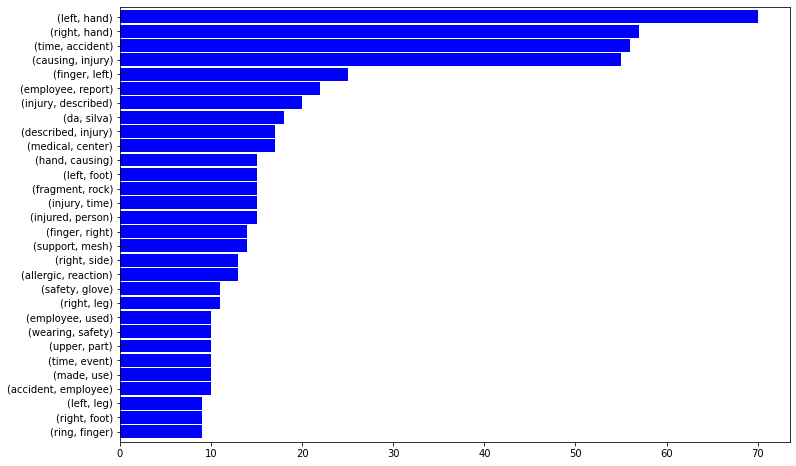

In [44]:
bi_gram.sort_values().plot.barh(color='blue', width=.9, figsize=(12, 8))

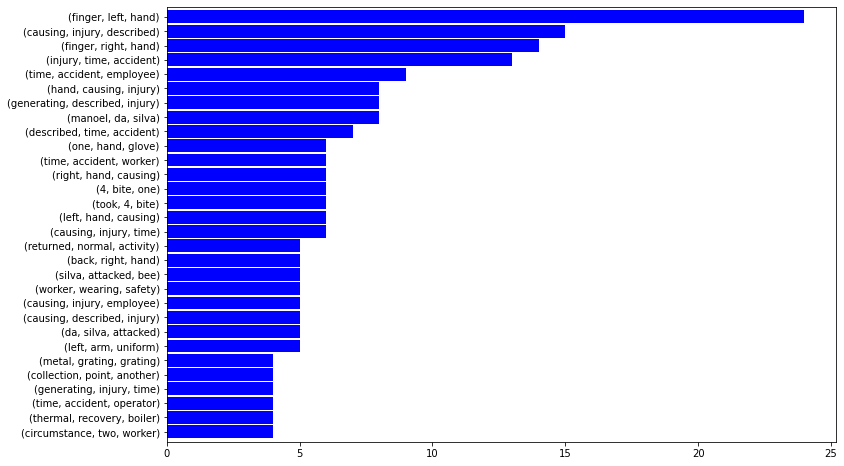

In [45]:
tri_gram.sort_values().plot.barh(color='blue', width=.9, figsize=(12, 8))

- A frequent occurrence in the n-grams are references to hands. In fact, hand is the second most common word in the dataset behind left, right, and causing.
- Most injuries involved hands as seen earlier
- Moreover there are other words which depict which side of the body parts got affected like right, left , upper.

In [46]:
corr=industry_data.corr()
corr

Year     Month       Day  WeekofYear
Year        1.000000 -0.421996 -0.001368   -0.424218
Month      -0.421996  1.000000 -0.001790    0.964812
Day        -0.001368 -0.001790  1.000000    0.058441
WeekofYear -0.424218  0.964812  0.058441    1.000000

In [47]:
industry_data.head(5)

Date     Country     Local  ...    Weekday WeekofYear  Season
0 2016-01-01  Country_01  Local_01  ...     Friday         53  Summer
1 2016-01-02  Country_02  Local_02  ...   Saturday         53  Summer
2 2016-01-06  Country_01  Local_03  ...  Wednesday          1  Summer
3 2016-01-08  Country_01  Local_04  ...     Friday          1  Summer
4 2016-01-10  Country_01  Local_04  ...     Sunday          1  Summer

[5 rows x 16 columns]

### Bivariant Analysis

#### Accident Levels and Potential Accident Levels by Gender

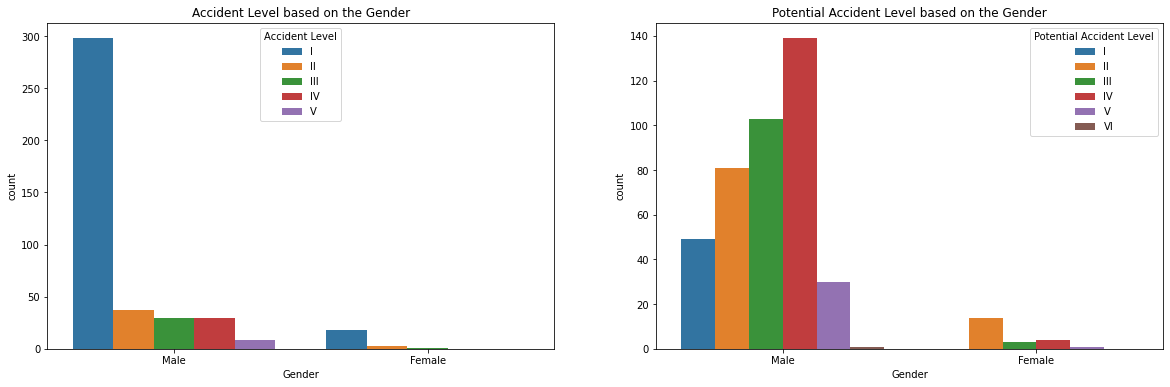

In [48]:
##Accident Levels and Potential Accident Levels by Gender
plt.figure(figsize=(20,6))
plt.subplot(1,2,1)
plt.title("Accident Level based on the Gender")
sns.countplot(x="Gender", data = industry_data, hue="Accident Level",hue_order=industry_data['Accident Level'].value_counts().sort_index().index)

plt.subplot(1,2,2)
plt.title("Potential Accident Level based on the Gender")
sns.countplot(x="Gender", data = industry_data, hue="Potential Accident Level", hue_order=industry_data['Potential Accident Level'].value_counts().sort_index().index)

- In Accident level, Level I signifies not severe and V signifies very severe.
- Males are more involved in Severe Accidents whereas Females are suffering with less Servere ones (Level II specifically)
- There are high number of the Level 1 accidents.

#### Accident Levels and Potential Accident Levels by Country

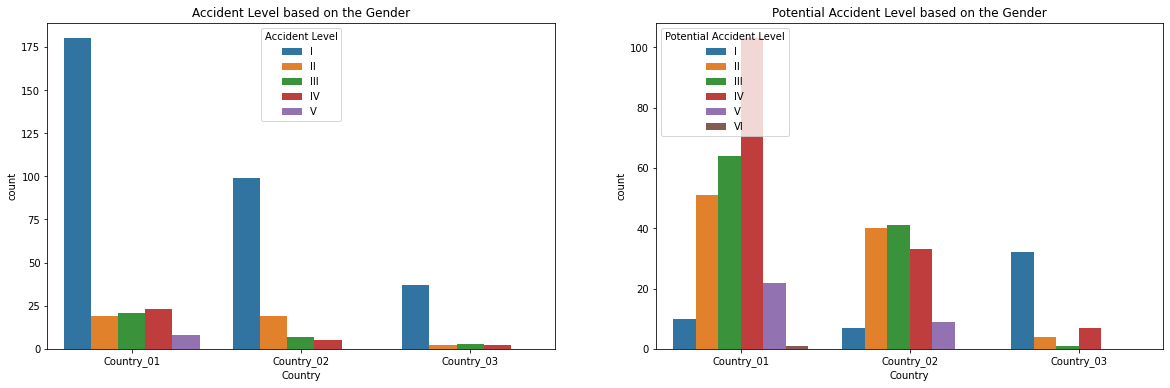

In [49]:
##Accident Levels and Potential Accident Levels by Gender
plt.figure(figsize=(20,6))
plt.subplot(1,2,1)
plt.title("Accident Level based on the Gender")
sns.countplot(x="Country", data = industry_data, hue="Accident Level",hue_order=industry_data['Accident Level'].value_counts().sort_index().index)

plt.subplot(1,2,2)
plt.title("Potential Accident Level based on the Gender")
sns.countplot(x="Country", data = industry_data, hue="Potential Accident Level", hue_order=industry_data['Potential Accident Level'].value_counts().sort_index().index)

- All 3 countries have more level 1 accidents 
- We can see country 3 has very minimal level of accidents 

#### Accident Levels and Potential Accident Levels by Industry sector

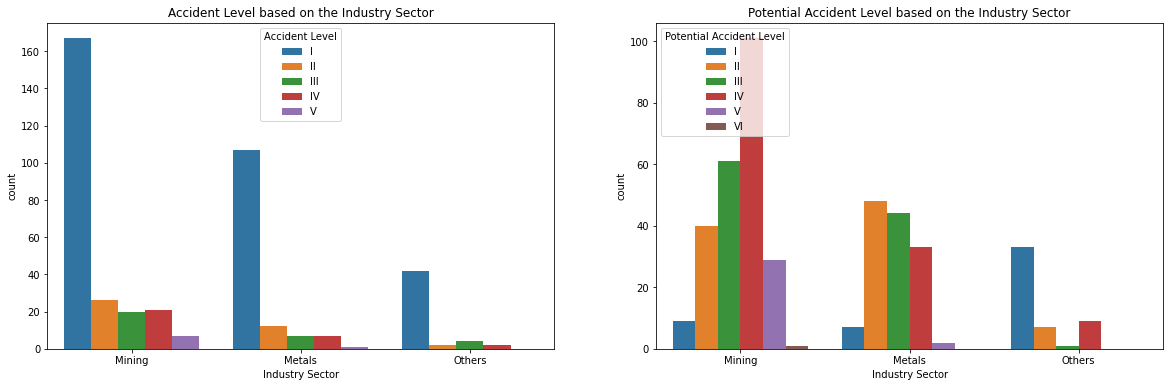

In [50]:
##Accident Levels and Potential Accident Levels by Industry Sector
plt.figure(figsize=(20,6))
plt.subplot(1,2,1)
plt.title("Accident Level based on the Industry Sector")
sns.countplot(x="Industry Sector", data = industry_data, hue="Accident Level",hue_order=industry_data['Accident Level'].value_counts().sort_index().index)

plt.subplot(1,2,2)
plt.title("Potential Accident Level based on the Industry Sector")
sns.countplot(x="Industry Sector", data = industry_data, hue="Potential Accident Level", hue_order=industry_data['Potential Accident Level'].value_counts().sort_index().index)

- Out of all industries, Mining Industry has seen some accidents whose level is the most severe and the corresponding potential Accident level is also highest.
This is followed by Metal industry and other.
- Severity levels of the incidents are more in Mining sector (rate of level 4 is slightly higher than the level 2 & 3)

#### Accident Levels and Potential Accident Levels by Employee type

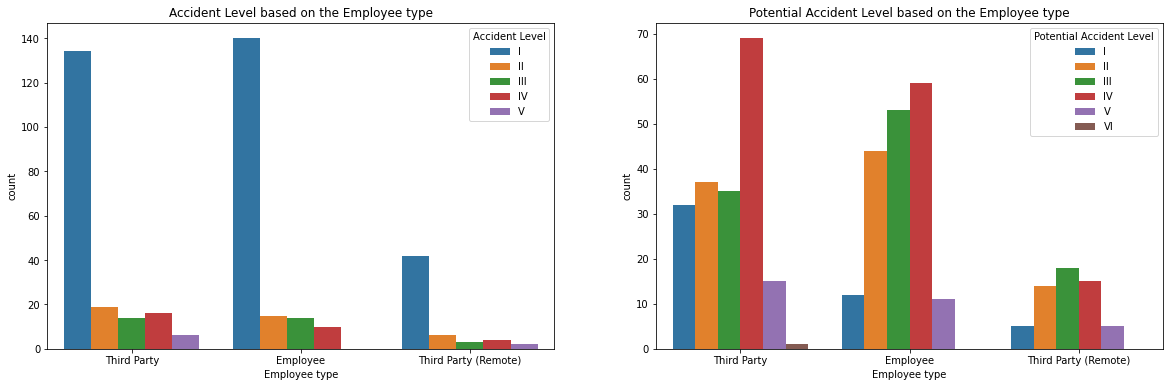

In [51]:
##Accident Levels and Potential Accident Levels by Employee type
plt.figure(figsize=(20,6))
plt.subplot(1,2,1)
plt.title("Accident Level based on the Employee type")
sns.countplot(x="Employee type", data = industry_data, hue="Accident Level",hue_order=industry_data['Accident Level'].value_counts().sort_index().index)

plt.subplot(1,2,2)
plt.title("Potential Accident Level based on the Employee type")
sns.countplot(x="Employee type", data = industry_data, hue="Potential Accident Level", hue_order=industry_data['Potential Accident Level'].value_counts().sort_index().index)

- Third Party Employees are more involved in Potential Accidents
- In the accidents, Employees and thrid party are more involved.
- We can observe that apart from Accident_Level_1 the people are also facing severe accidents (Accident_Level_IV)

Accident Levels and Potential Accident Levels by Season

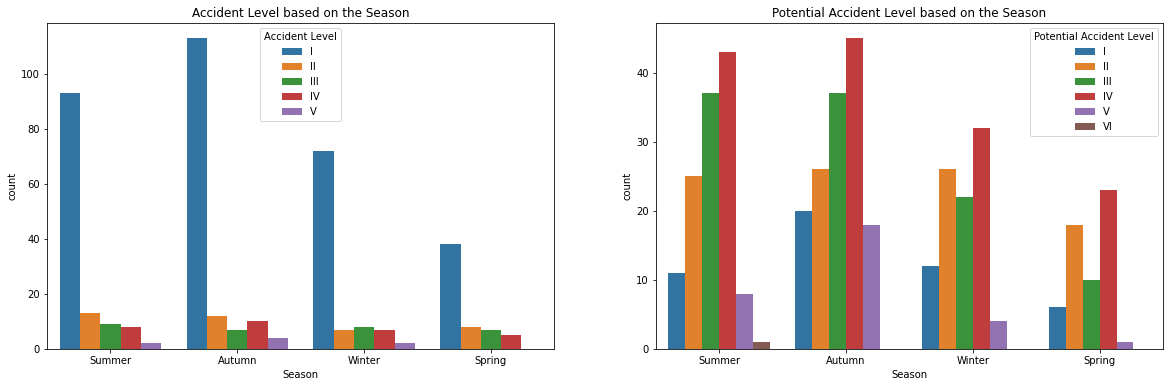

In [52]:
##Accident Levels and Potential Accident Levels by Season
plt.figure(figsize=(20,6))
plt.subplot(1,2,1)
plt.title("Accident Level based on the Season")
sns.countplot(x="Season", data = industry_data, hue="Accident Level",hue_order=industry_data['Accident Level'].value_counts().sort_index().index)

plt.subplot(1,2,2)
plt.title("Potential Accident Level based on the Season")
sns.countplot(x="Season", data = industry_data, hue="Potential Accident Level", hue_order=industry_data['Potential Accident Level'].value_counts().sort_index().index)

- Both of the two accident level are more in Autumn followed by Summer compared to other seasons

Accident Levels and Potential Accident Levels by Month

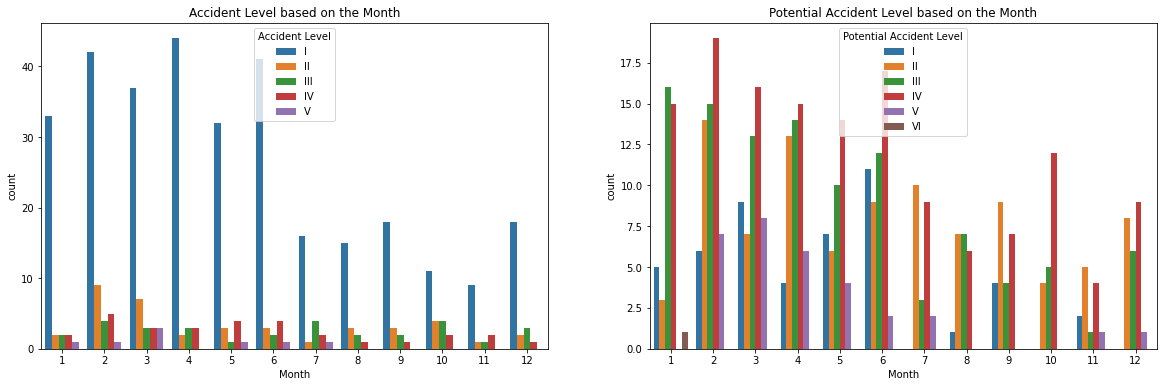

In [53]:
## Accident Levels and Potential Accident Levels by Month
plt.figure(figsize=(20,6))
plt.subplot(1,2,1)
plt.title("Accident Level based on the Month")
sns.countplot(x="Month", data = industry_data, hue="Accident Level",hue_order=industry_data['Accident Level'].value_counts().sort_index().index)

plt.subplot(1,2,2)
plt.title("Potential Accident Level based on the Month")
sns.countplot(x="Month", data = industry_data, hue="Potential Accident Level", hue_order=industry_data['Potential Accident Level'].value_counts().sort_index().index)

- Accident level have the tendency that non-severe levels(I,II) decreased throughout the year but severe(III, IV) levels did not change much.
Initial months see more accidents which seem to decrease by year end
- High level accidents(V) occur in the initial months

Accident Levels and Potential Accident Levels by Weekday

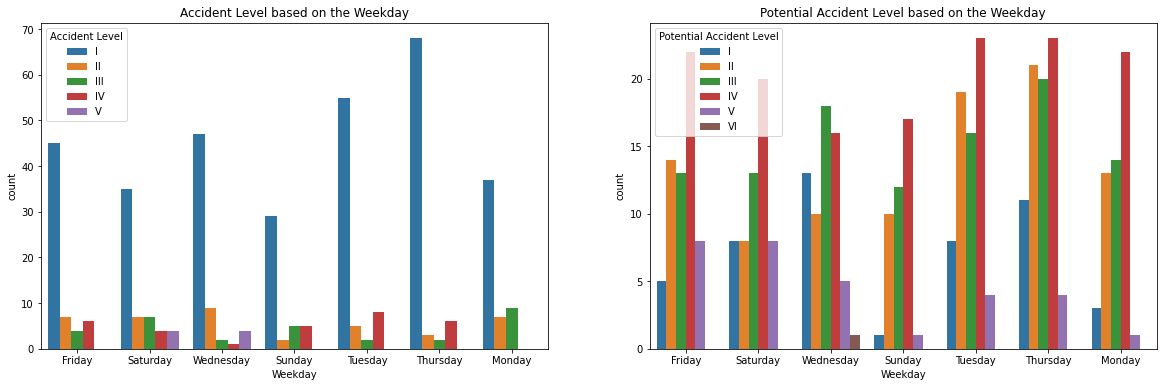

In [54]:
## Accident Levels and Potential Accident Levels by Weekday
plt.figure(figsize=(20,6))
plt.subplot(1,2,1)
plt.title("Accident Level based on the Weekday")
sns.countplot(x="Weekday", data = industry_data, hue="Accident Level",hue_order=industry_data['Accident Level'].value_counts().sort_index().index)

plt.subplot(1,2,2)
plt.title("Potential Accident Level based on the Weekday")
sns.countplot(x="Weekday", data = industry_data, hue="Potential Accident Level", hue_order=industry_data['Potential Accident Level'].value_counts().sort_index().index)

- Accidents are more on weekdays compared to weekends
- Severe accidents(IV) occurs mostly on Tuesday, Thursday

Accident Levels and Potential Accident Levels by Critical Risk	

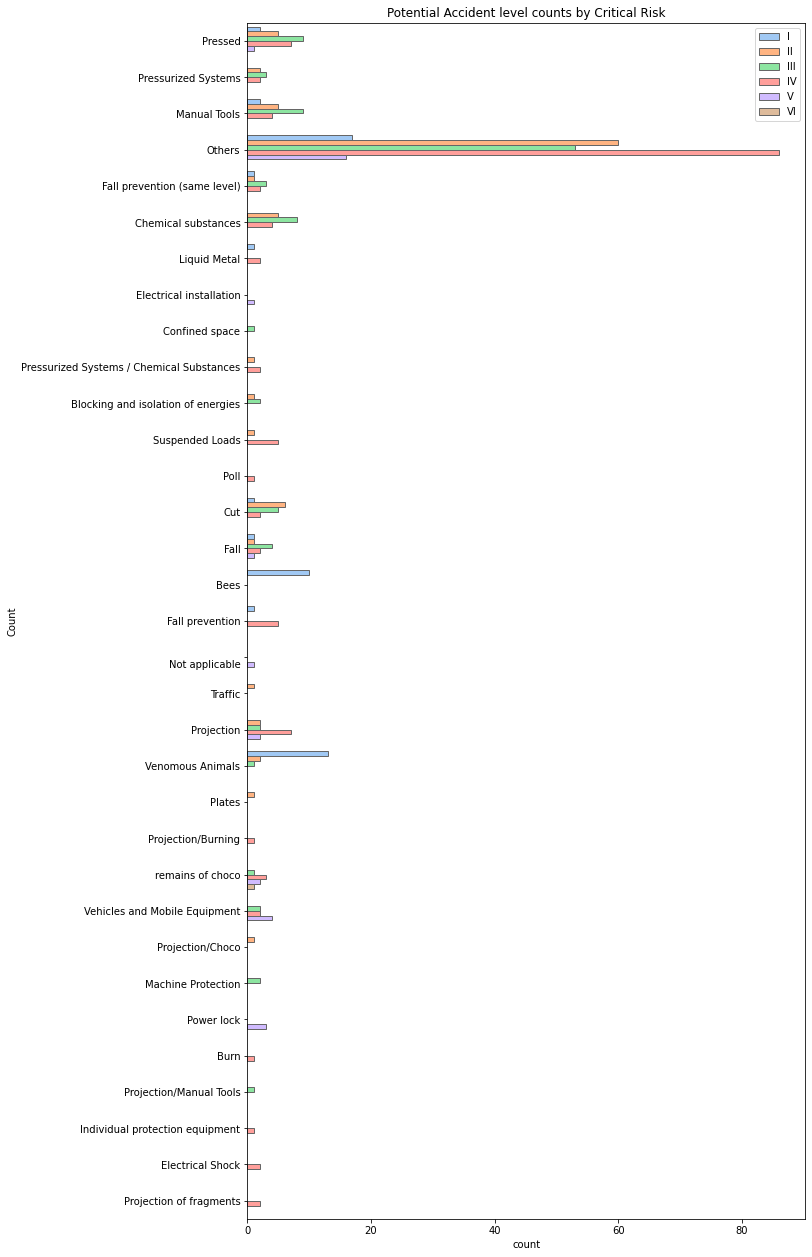

In [55]:
plt.figure(figsize=(10,22))
ax = sns.countplot(y = industry_data['Critical Risk'], hue=industry_data['Potential Accident Level'], hue_order=industry_data['Potential Accident Level'].value_counts().sort_index().index, palette='pastel', edgecolor='.4', saturation=1)

plt.title('Potential Accident level counts by Critical Risk');
plt.ylabel('Count');
plt.legend(loc='upper right')

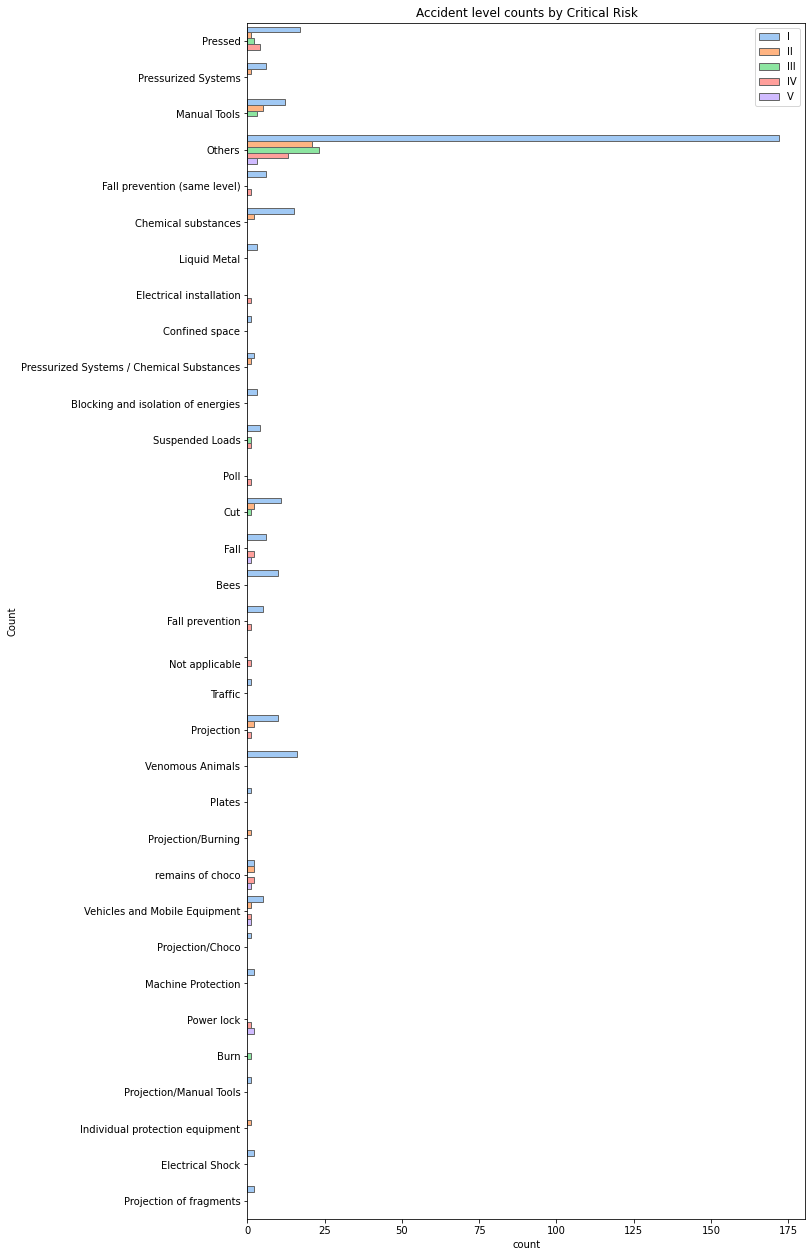

In [56]:
plt.figure(figsize=(10,22))
ax = sns.countplot(y = industry_data['Critical Risk'], hue=industry_data['Accident Level'], hue_order=industry_data['Accident Level'].value_counts().sort_index().index, palette='pastel', edgecolor='.4', saturation=1)

# total = sum(industry_data['Critical_Risk'].value_counts())
# for p in ax.patches:
#     ax.annotate('{}'.format(p.get_height()), 
#                 (p.get_x(), p.get_height()),
#                  size=12,
#                  xytext = (0, 3), 
#                  textcoords = 'offset points')

plt.title('Accident level counts by Critical Risk');
plt.ylabel('Count');
plt.legend(loc='upper right')

- The both accident levels are high for 'Others', the thought is there are too many risks to classify precisely and it is difficult to specify easily.

Accident Levels and Potential Accident Levels by Locals

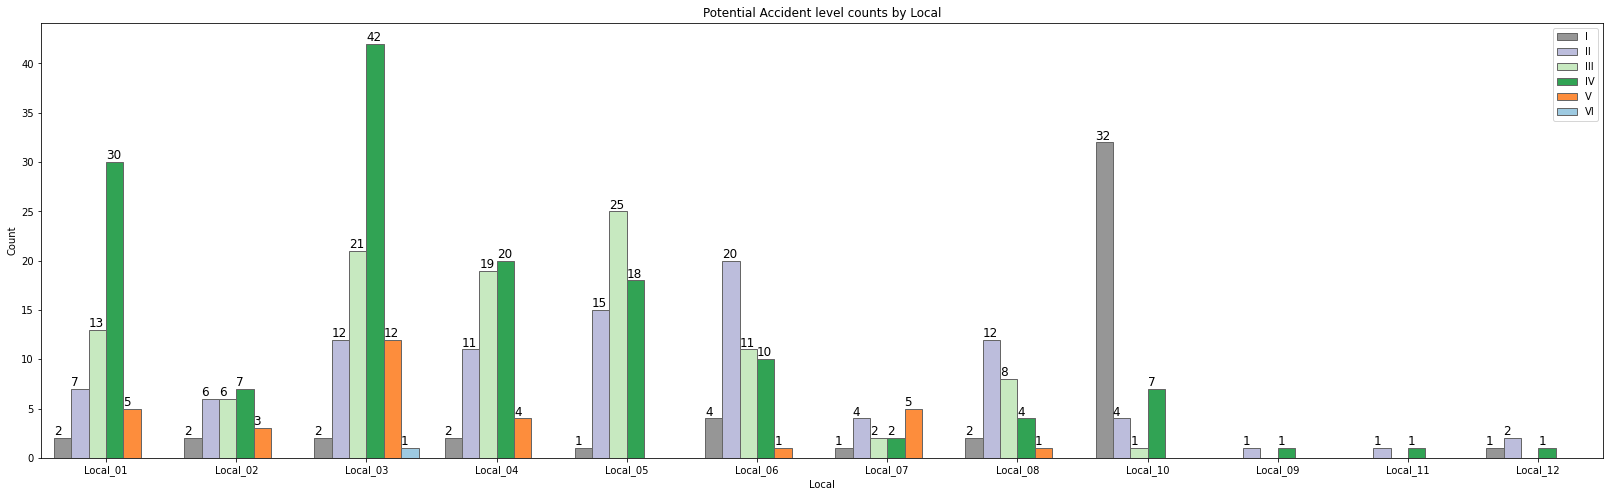

In [57]:
plt.figure(figsize=(28,8))
ax = sns.countplot(industry_data['Local'], hue=industry_data['Potential Accident Level'], hue_order=industry_data['Potential Accident Level'].value_counts().sort_index().index, palette='tab20c_r', edgecolor='.4', saturation=1)

total = sum(industry_data['Local'].value_counts())
for p in ax.patches:
    ax.annotate('{:.0f}'.format(p.get_height()), 
                (p.get_x(), p.get_height()),
                 size=12,
                 xytext = (0, 3), 
                 textcoords = 'offset points')

plt.title('Potential Accident level counts by Local');
plt.ylabel('Count');
plt.legend(loc='upper right')

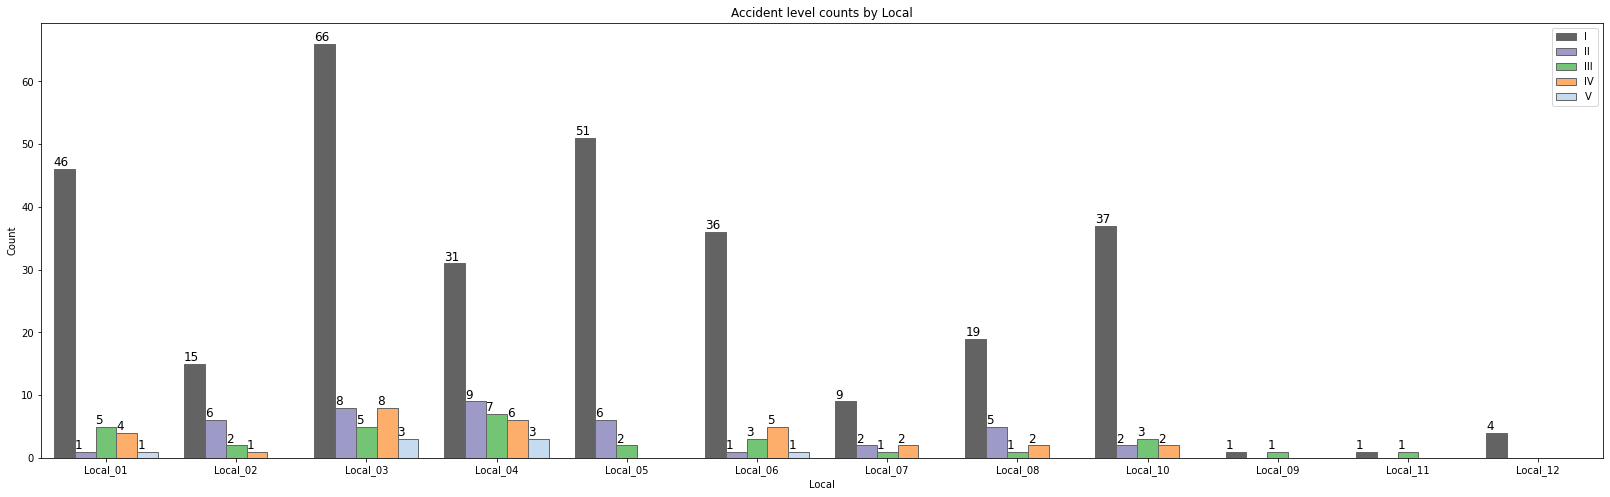

In [58]:
plt.figure(figsize=(28,8))
ax = sns.countplot(industry_data['Local'], hue=industry_data['Accident Level'], hue_order=industry_data['Accident Level'].value_counts().sort_index().index, palette='tab20c_r', edgecolor='.4', saturation=1)

total = sum(industry_data['Local'].value_counts())
for p in ax.patches:
    ax.annotate('{:.0f}'.format(p.get_height()), 
                (p.get_x(), p.get_height()),
                 size=12,
                 xytext = (0, 3), 
                 textcoords = 'offset points')

plt.title('Accident level counts by Local');
plt.ylabel('Count');
plt.legend(loc='upper right')

- Local_03 is where most of the accidents happen followed by local 05

Accident Level vs potential Accident Level

In [59]:
# Getting the value counts of each of the columns
accident = industry_data['Accident Level'].value_counts()
potential = industry_data['Potential Accident Level'].value_counts()

# Merging both values of the dataframe
acc_pot = pd.concat([accident, potential], axis=1,sort=False).fillna(0).reset_index()

# Need to melt down columns so that they can be treated as hue in plotting
acc_pot = pd.melt(acc_pot, ['index'], var_name='Accident type', value_name='count')
acc_pot

index             Accident type  count
0      I            Accident Level  316.0
1     II            Accident Level   40.0
2    III            Accident Level   31.0
3     IV            Accident Level   30.0
4      V            Accident Level    8.0
5     VI            Accident Level    0.0
6      I  Potential Accident Level   49.0
7     II  Potential Accident Level   95.0
8    III  Potential Accident Level  106.0
9     IV  Potential Accident Level  143.0
10     V  Potential Accident Level   31.0
11    VI  Potential Accident Level    1.0

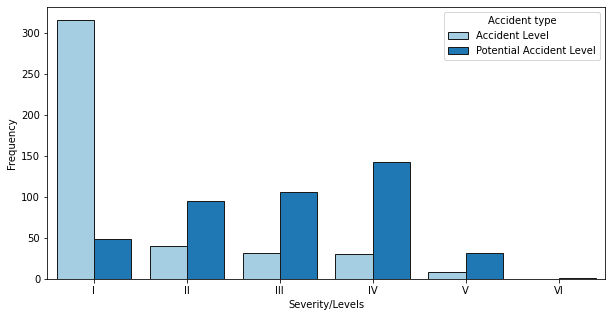

In [60]:
plt.figure(figsize=(10,5))
sns.barplot(acc_pot['index'], acc_pot['count'], hue=acc_pot['Accident type'], palette='Paired', edgecolor='.1', saturation=1)

plt.xlabel('Severity/Levels');
plt.ylabel('Frequency');

-  there is a significant difference between the severity of an incident, and the potential severity of the incident.
- If the number of accidents increases, the potential accident level decreases
- There are high number of the Level 1 accidents.

We can add more visualization with other independent variables

Employee type by Gender count

Since Gender is more biased towards male, we are taking ratio count with respect to other variables

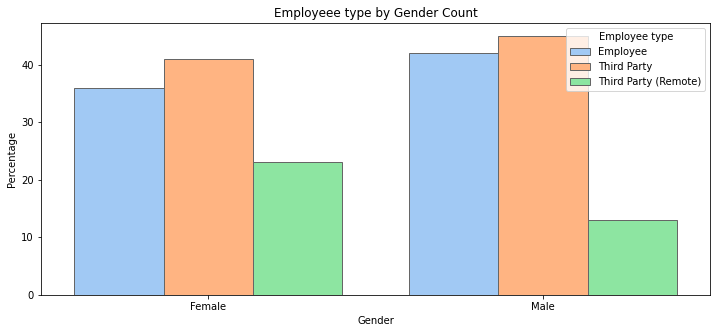

In [61]:
df1 = industry_data.groupby(['Gender','Employee type'])['Employee type'].count()

df1 = df1.unstack().apply(lambda x: round(x / x.sum()*100), axis=1).reset_index() 
df1 = pd.melt(df1, ['Gender'])

plt.figure(figsize=(12,5))
sns.barplot(df1['Gender'], df1['value'], hue=df1['Employee type'], palette='pastel', edgecolor='.4', saturation=1);
plt.title('Employeee type by Gender Count');
plt.ylabel('Percentage');

- Division of employee_type in men and women is almost same
- As seen in the above plots third party empoloyees are slightly higher than the employee count in both of the sectors(men&women)
- Proportion of female third party remote employee is moderately higher than that of the males

Industry_Sector by Gender Count

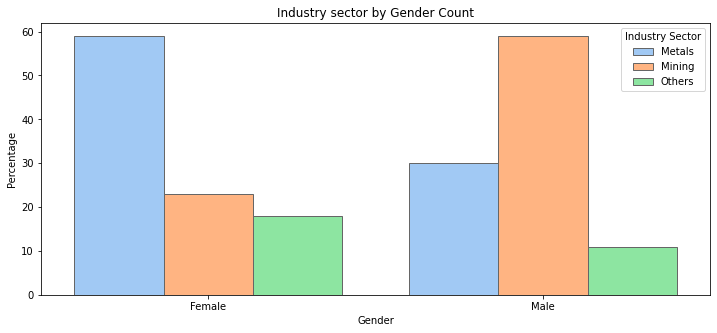

In [62]:
df1 = industry_data.groupby(['Gender','Industry Sector'])['Industry Sector'].count()

df1 = df1.unstack().apply(lambda x: round(x / x.sum()*100), axis=1).reset_index() 
df1 = pd.melt(df1, ['Gender'])

plt.figure(figsize=(12,5))
sns.barplot(df1['Gender'], df1['value'], hue=df1['Industry Sector'], palette='pastel', edgecolor='.4', saturation=1);
plt.title('Industry sector by Gender Count');
plt.ylabel('Percentage');

- There is a major diferrence in mining and metals industries within males and females
- We can observe the distinct safety levels by the industry sectors towards male and female

Critical Risk counts by Gender

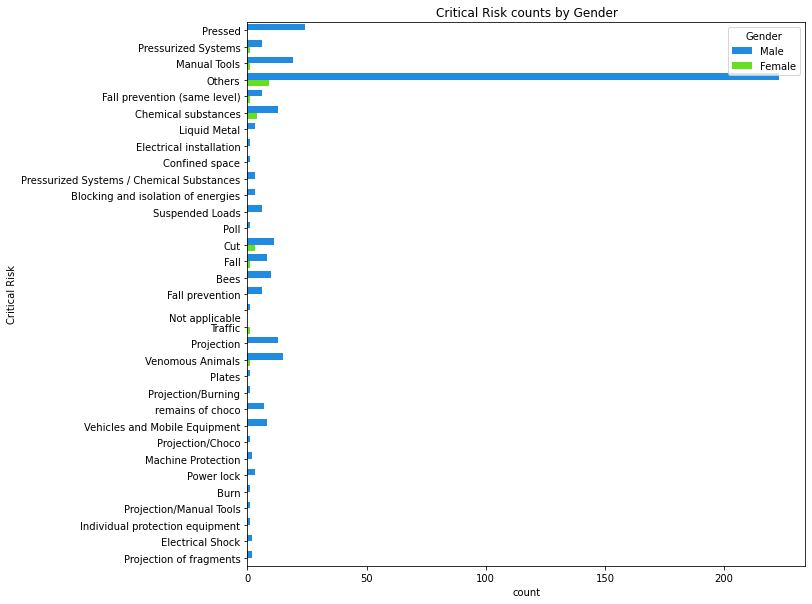

In [63]:
plt.figure(figsize=(10,10))
sns.countplot(y = industry_data['Critical Risk'], hue=industry_data['Gender'], palette='gist_rainbow_r')
plt.title('Critical Risk counts by Gender');

- There are some amount of females who involved in Critical Risks such as Chemical Substances, Cut, Fall other than Others category


 Country and Local

<Figure size 864x360 with 0 Axes>

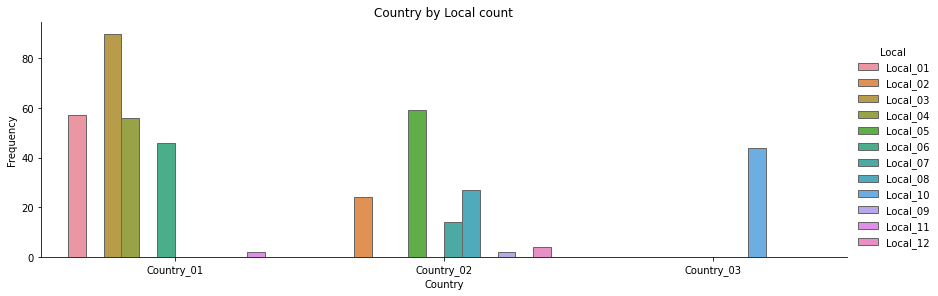

In [64]:
plt.figure(figsize=(12,5))
sns.catplot(data=industry_data, kind='count', x='Country', hue='Local', size=4, aspect=3, edgecolor='.4');
plt.title('Country by Local count');
plt.ylabel('Frequency');


- Local 03 belongs to country 01 where more accidents occurs which we can see in the above graph(Accident Levels and Potential Accident Levels by Locals)

Industry sector and Country

<Figure size 864x360 with 0 Axes>

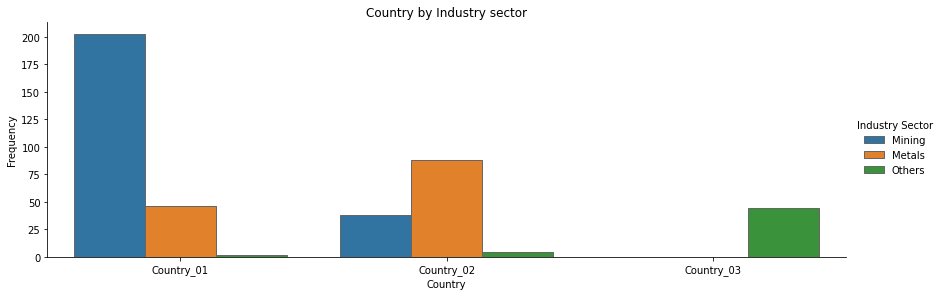

In [65]:
plt.figure(figsize=(12,5))
sns.catplot(data=industry_data, kind='count', x='Country', hue='Industry Sector', size=4, aspect=3, edgecolor='.4');
plt.title('Country by Industry sector');
plt.ylabel('Frequency');

- Country01 has more industry and it is evident from aboves graphs that accidents occurs more in country01.
- And also mining industry contributes more in accidents which is in country 01

Correlation plot

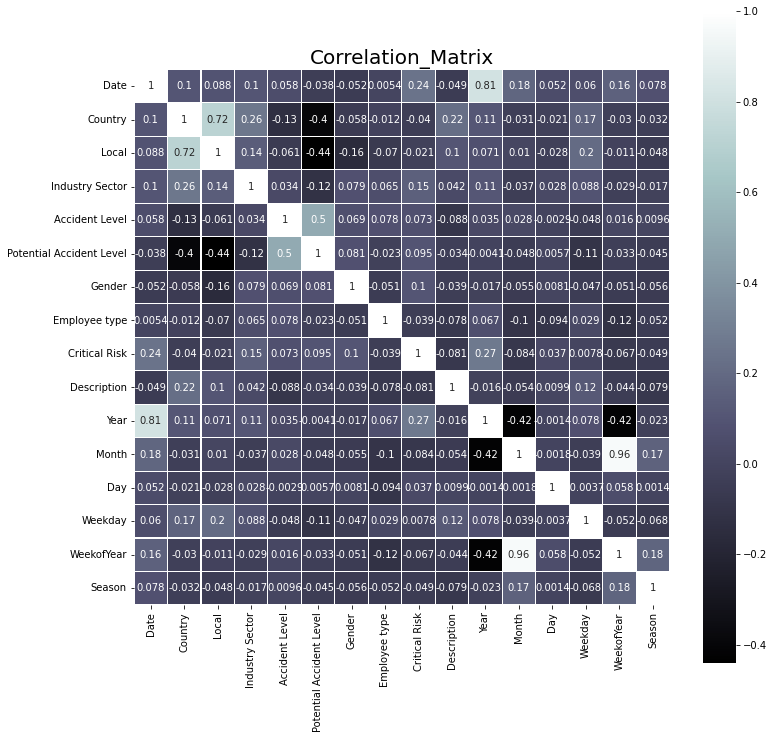

In [66]:
le = LabelEncoder()
industry_enc = industry_data.apply(le.fit_transform)

plt.figure(figsize=(12,12))
plt.title('Correlation_Matrix', fontsize=20)
sns.heatmap(industry_enc.corr(), square=True, cmap='bone', annot=True, linewidth=0.2);

- There is a moderate correleation among the values. 
- Highest correlation found between country and local

### NLP Preprocessing

Few of the NLP pre-processing steps taken before applying model on the data

- Converting to lower case, avoid any capital cases
- Converting apostrophe to the standard lexicons
- Removing punctuations
- Lemmatization
- Removing stop words

In [67]:
# nlp libraries
import nltk
nltk.download('punkt')
nltk.download('stopwords')
import string
from nltk.tokenize import word_tokenize
from tqdm import tqdm
from nltk.corpus import stopwords
stopwords = stopwords.words('english')
from nltk import tokenize,stem

from wordcloud import WordCloud, STOPWORDS

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [68]:
def text_cleaning(text):
   # Initialize the object for Lemmatizer class
    lemmatizer = nltk.stem.WordNetLemmatizer()

    # Set the stopwords to English
    stopwords = nltk.corpus.stopwords.words('english')

    # Normalize the text in order deal with accented words and unicodes
    text = (unicodedata.normalize('NFKD', text).encode('ascii', 'ignore').decode('utf-8', 'ignore').lower())

    remove_punct_dict = dict((ord(punct), None) for punct in string.punctuation)
    #word tokenization
    words = nltk.word_tokenize(text.translate(remove_punct_dict))

    # Consider the words which are not in stopwords of english and lemmatize them
    lemmatizer = nltk.stem.WordNetLemmatizer()
    lems = [lemmatizer.lemmatize(i) for i in words if i not in stopwords]

    return lems

In [69]:
# Apply all the preprocessing techniques we have defined on Description columns
tokens = text_cleaning(' '.join(industry_data['Description'].sum().split()))
# words = des_cleaning(''.join(str(df['Description'].tolist())))


In [70]:
# Verifying by printing first 20 words
print('Length of all the words:', len(tokens),'\n')
print('Length of unique tokens in the dataset:', len(np.unique(tokens)),'\n')
np.array(tokens[0:20])

Length of all the words: 14677 

Length of unique tokens in the dataset: 3504 



array(['removing', 'drill', 'rod', 'jumbo', '08', 'maintenance',
       'supervisor', 'proceeds', 'loosen', 'support', 'intermediate',
       'centralizer', 'facilitate', 'removal', 'seeing', 'mechanic',
       'support', 'one', 'end', 'drill'], dtype='<U12')

In [71]:
industry_data['Cleaned_Description'] = industry_data.apply(lambda x: " ".join(text_cleaning(x.Description)), axis=1)

In [72]:
industry_data.head(3)

Date  ...                                Cleaned_Description
0 2016-01-01  ...  removing drill rod jumbo 08 maintenance superv...
1 2016-01-02  ...  activation sodium sulphide pump piping uncoupl...
2 2016-01-06  ...  substation milpo located level 170 collaborato...

[3 rows x 17 columns]

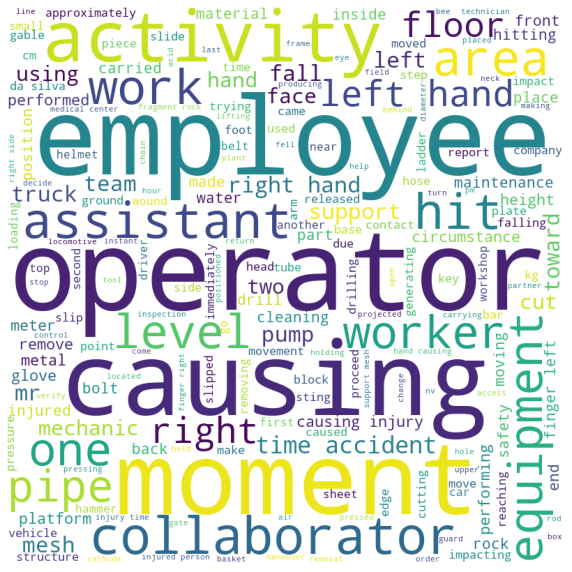

In [73]:
wordcloud = WordCloud(width = 800, height = 800, 
                background_color ='white', 
                stopwords = stopwords,
                min_font_size = 10).generate(' '.join(tokens))

plt.figure(figsize = (10, 15), facecolor = 'white', edgecolor='blue') 
plt.imshow(wordcloud) 
plt.axis("off") 
  
plt.show()

#### Observations

> There are many body-related, employee related, movement-related, equipment-related and accident-related words.

- Body-related: left, right, hand, finger, face, foot and glove
- Employee-related: employee, operator, collaborator, assistant, worker and mechanic
- Movement-related: fall, hit, lift and slip
- Equipment-related: equipment, pump, meter, drill, truck and tube

Lets work on the word cloud based in the Accident Levels

#### Wordcloud for Accident Level - I

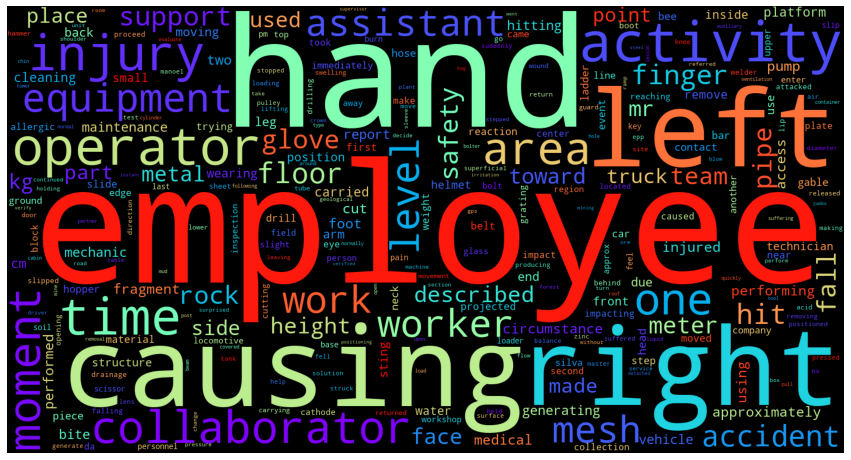

In [74]:
accidentLevel1 = industry_data[industry_data['Accident Level']== 'I']
accidentLevel1
wordcloud = WordCloud(width = 1500, height = 800, random_state=0, background_color='black', colormap='rainbow', \
                      min_font_size=5, max_words=300, collocations=False, stopwords = STOPWORDS).generate(' '.join(accidentLevel1['Cleaned_Description'].values))
plt.figure(figsize=(15,10))
plt.imshow(wordcloud)
plt.axis('off')
plt.show()

In [75]:
#### most common words when the accident level I occurs
accLevelI_count = text_cleaning(' '.join(industry_data[industry_data['Accident Level']== 'I']['Description'].sum().split()))
(pd.Series(nltk.ngrams(accLevelI_count, 1)).value_counts())[:30]

(employee,)        117
(causing,)         114
(right,)           112
(left,)            109
(hand,)            102
(operator,)         89
(activity,)         88
(time,)             84
(moment,)           67
(area,)             66
(one,)              64
(collaborator,)     64
(level,)            58
(worker,)           57
(assistant,)        56
(mesh,)             56
(equipment,)        56
(work,)             55
(injury,)           53
(floor,)            49
(hit,)              49
(accident,)         48
(support,)          45
(safety,)           44
(finger,)           44
(pipe,)             43
(rock,)             42
(fall,)             42
(meter,)            37
(team,)             37
dtype: int64

- For the Accident level 1, the following are the most occured words
 - left hand right hand, finger, glove
 - employee, assistant, operator, worker
 - work area, floor

#### Wordcloud for Accident Level - II

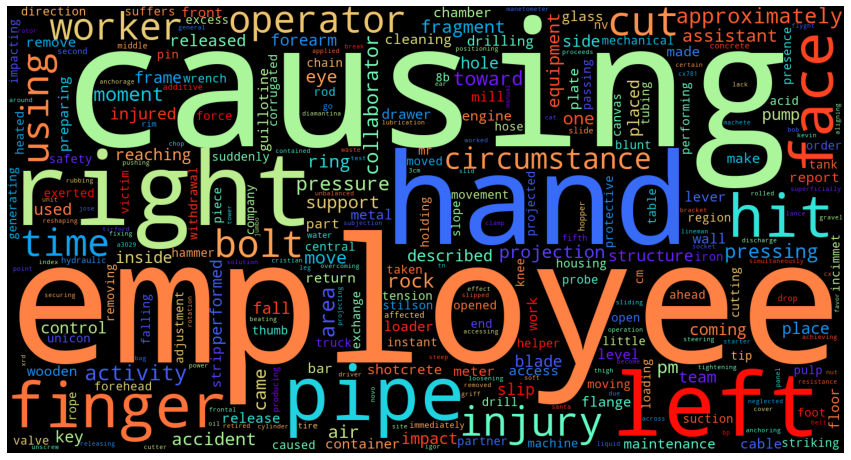

In [76]:
accidentLevel2 = industry_data[industry_data['Accident Level']== 'II']
accidentLevel2
wordcloud = WordCloud(width = 1500, height = 800, random_state=0, background_color='black', colormap='rainbow', \
                      min_font_size=5, max_words=300, collocations=False, stopwords = STOPWORDS).generate(" ".join(accidentLevel2['Cleaned_Description'].values))
plt.figure(figsize=(15,10))
plt.imshow(wordcloud)
plt.axis('off')
plt.show()

In [77]:
#### most common words when the accident level II occurs
accLevelII_count = text_cleaning(' '.join(industry_data[industry_data['Accident Level']== 'II']['Description'].sum().split()))
(pd.Series(nltk.ngrams(accLevelII_count, 1)).value_counts())[:30]

(causing,)          23
(employee,)         19
(hand,)             19
(right,)            19
(left,)             13
(pipe,)             12
(finger,)           10
(hit,)              10
(face,)              9
(operator,)          8
(using,)             8
(worker,)            8
(time,)              8
(area,)              7
(approximately,)     7
(activity,)          7
(circumstance,)      7
(cut,)               7
(bolt,)              7
(rock,)              6
(pressing,)          6
(collaborator,)      6
(pressure,)          6
(moment,)            6
(air,)               5
(towards,)           5
(fragment,)          5
(ring,)              5
(one,)               5
(equipment,)         5
dtype: int64

- For the Accident level II, the following are the most occured words
 - right hand, finger, left, face
 - employee, operator, worker
 - injury type like cut, hit
 - injury by, pipe, bolt

#### Wordcloud for Accident Level - III

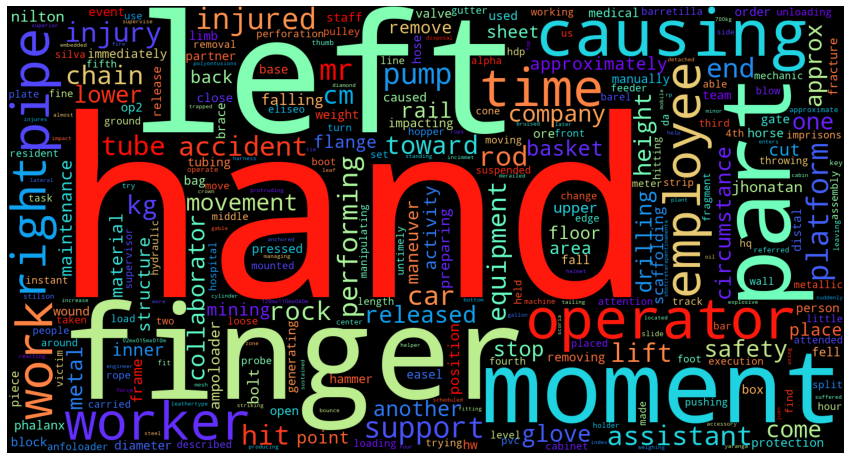

In [78]:
accidentLevel3 = industry_data[industry_data['Accident Level']== 'III']
accidentLevel3
wordcloud = WordCloud(width = 1500, height = 800, random_state=0, background_color='black', colormap='rainbow', \
                      min_font_size=5, max_words=300, collocations=False, stopwords = STOPWORDS).generate(" ".join(accidentLevel3['Cleaned_Description'].values))
plt.figure(figsize=(15,10))
plt.imshow(wordcloud)
plt.axis('off')
plt.show()

In [79]:
#### most common words when the accident level III occurs
accLevelIII_count = text_cleaning(' '.join(industry_data[industry_data['Accident Level']== 'III']['Description'].sum().split()))
(pd.Series(nltk.ngrams(accLevelIII_count, 1)).value_counts())[:30]

(hand,)          23
(left,)          18
(finger,)        15
(moment,)        14
(part,)          13
(causing,)       13
(operator,)      13
(worker,)        11
(time,)          11
(pipe,)          11
(work,)          10
(employee,)      10
(right,)          9
(platform,)       8
(pump,)           8
(injured,)        8
(performing,)     7
(end,)            7
(accident,)       7
(rod,)            7
(car,)            7
(mr,)             7
(hit,)            7
(tube,)           7
(support,)        7
(assistant,)      7
(cm,)             6
(kg,)             6
(rock,)           6
(chain,)          6
dtype: int64

- For the Accident level III, the following are the most occured words
 - right hand, finger, left, face
 - employee, worker, assistant
 - injury type: like  hit
 - injury by: pipe, bolt, pump, piece of metal
  - time and circumstance

#### Wordcloud for Accident Level - IV

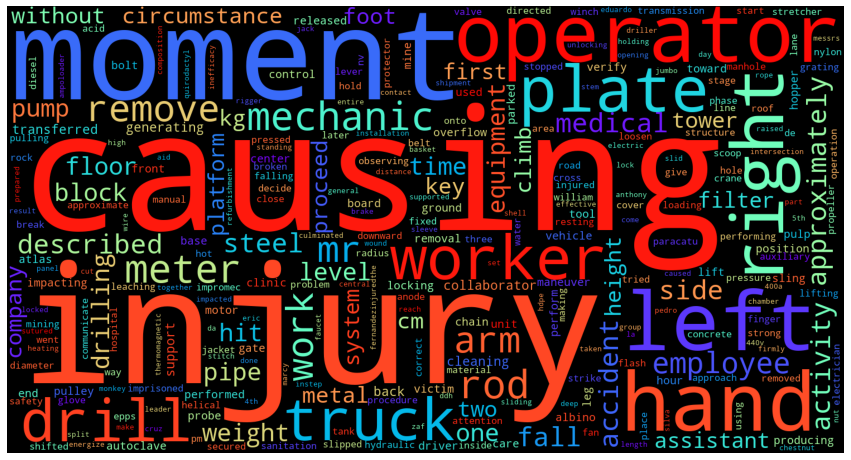

In [80]:
accidentLevel4 = industry_data[industry_data['Accident Level']== 'IV']
accidentLevel4
wordcloud = WordCloud(width = 1500, height = 800, random_state=0, background_color='black', colormap='rainbow', \
                      min_font_size=5, max_words=300, collocations=False, stopwords = STOPWORDS).generate(" ".join(accidentLevel4['Cleaned_Description'].values))
plt.figure(figsize=(15,10))
plt.imshow(wordcloud)
plt.axis('off')
plt.show()

In [81]:
#### most common words when the accident level IV occurs
accLevelIV_count = text_cleaning(' '.join(industry_data[industry_data['Accident Level']== 'IV']['Description'].sum().split()))
(pd.Series(nltk.ngrams(accLevelIV_count, 1)).value_counts())[:30]

(causing,)     16
(moment,)      14
(hand,)        14
(left,)        14
(operator,)    14
(right,)       11
(plate,)       11
(worker,)      10
(truck,)        9
(injury,)       9
(drill,)        9
(mechanic,)     8
(rod,)          8
(meter,)        8
(remove,)       7
(mr,)           7
(work,)         7
(employee,)     6
(accident,)     6
(arm,)          6
(side,)         6
(medical,)      6
(steel,)        6
(fall,)         6
(one,)          5
(weight,)       5
(drilling,)     5
(time,)         5
(pipe,)         5
(pump,)         5
dtype: int64

- For the Accident level IV, the following are the most occured words
 - right hand, finger, left, face, arm
 - employee, worker, operator
 - injury type: hit
 - injury by: pipe, bolt, pump, rod, drill , truck

#### Wordcloud for Accident Level - V

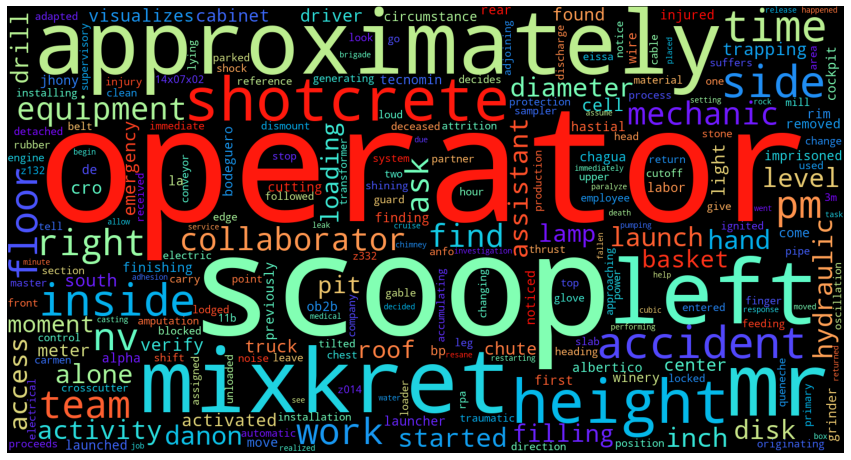

In [82]:
accidentLevel5 = industry_data[industry_data['Accident Level']== 'V']
accidentLevel5
wordcloud = WordCloud(width = 1500, height = 800, random_state=0, background_color='black', colormap='rainbow', \
                      min_font_size=5, max_words=300, collocations=False, stopwords = STOPWORDS).generate(" ".join(accidentLevel5['Cleaned_Description'].values))
plt.figure(figsize=(15,10))
plt.imshow(wordcloud)
plt.axis('off')
plt.show()

In [83]:
#### most common words when the accident level V occurs
accLevelV_count = text_cleaning(' '.join(industry_data[industry_data['Accident Level']== 'V']['Description'].sum().split()))
(pd.Series(nltk.ngrams(accLevelV_count, 1)).value_counts())[:30]

(operator,)         8
(scoop,)            6
(mr,)               5
(mixkret,)          5
(approximately,)    5
(left,)             5
(shotcrete,)        4
(time,)             4
(accident,)         4
(inside,)           4
(height,)           4
(side,)             4
(x,)                3
(mechanic,)         3
(right,)            3
(team,)             3
(work,)             3
(find,)             3
(nv,)               3
(equipment,)        3
(floor,)            3
(pm,)               3
(drill,)            2
(asks,)             2
(4,)                2
(driver,)           2
(basket,)           2
(level,)            2
(filling,)          2
(started,)          2
dtype: int64

- For the Accident level V, the following are the most occured words
 - right hand, finger, left, face
 - assistant, mechanic, operator
 - injury type: like  hit
 - injury by: pipe, bolt, pump, piece of metal
 - shotcrete, mixkret,height, scoop

### Feature Engineering

In [84]:
industry_data[industry_data['Accident Level']=='II']['Cleaned_Description'][22]

'aligning right bracket tower n 32 releasing tension applied tirford 15 tn pushing lever towards tension release point return mechanical effect overcoming resistance lineman operator reshaping hand assistant beating assistant frontal region'

In [85]:
ind_feature_data=industry_data.copy()
ind_feature_data.head(1)

Date  ...                                Cleaned_Description
0 2016-01-01  ...  removing drill rod jumbo 08 maintenance superv...

[1 rows x 17 columns]

Grouping the accident level based on the severity. Grouping accident level I and II as low level in a group, Level 3 as medium, Level 4 and 5 in a grp as High


In [86]:
ind_feature_data['AccidentLevel_grp'] = industry_data['Accident Level'].replace('II','I')
ind_feature_data['AccidentLevel_grp'] = ind_feature_data['AccidentLevel_grp'].replace('III','II').replace('IV','III').replace('V','III')

In [87]:
ind_feature_data['AccidentLevel_grp'].value_counts()

I      356
III     38
II      31
Name: AccidentLevel_grp, dtype: int64

Label Encoding

In [88]:
ind_feature_data['Country'] = LabelEncoder().fit_transform(ind_feature_data['Country']).astype(np.int8)
ind_feature_data['Local'] = LabelEncoder().fit_transform(ind_feature_data['Local']).astype(np.int8)
ind_feature_data['Industry Sector'] = LabelEncoder().fit_transform(ind_feature_data['Industry Sector']).astype(np.int8)
ind_feature_data['AccidentLevel_grp'] = LabelEncoder().fit_transform(ind_feature_data['AccidentLevel_grp']).astype(np.int8)
ind_feature_data['Potential Accident Level'] = LabelEncoder().fit_transform(ind_feature_data['Potential Accident Level']).astype(np.int8)
ind_feature_data['Gender'] = LabelEncoder().fit_transform(ind_feature_data['Gender']).astype(np.int8)
ind_feature_data['Employee type'] = LabelEncoder().fit_transform(ind_feature_data['Employee type']).astype(np.int8)
ind_feature_data['Critical Risk'] = LabelEncoder().fit_transform(ind_feature_data['Critical Risk']).astype(np.int8)
ind_feature_data['Weekday'] = LabelEncoder().fit_transform(ind_feature_data['Weekday']).astype(np.int8)
ind_feature_data['Season'] = LabelEncoder().fit_transform(ind_feature_data['Season']).astype(np.int8)
# ind_feature_data.drop(['Date','Description', 'Description_processed'],axis=1,inplace=True)
ind_feature_data.head(3)

Date  ...  AccidentLevel_grp
0 2016-01-01  ...                  0
1 2016-01-02  ...                  0
2 2016-01-06  ...                  0

[3 rows x 18 columns]

In [89]:
ind_feature_data.drop(['Date','Accident Level','Description','Cleaned_Description'],inplace=True,axis=1)

### Model Building

Target label - Accident level

###TF-IDF

In [90]:
ind_tfidf_df = pd.DataFrame()
for i in [1,2,3]:
    vec_tfidf = TfidfVectorizer(max_features=10, norm='l2', stop_words='english', lowercase=True, use_idf=True, ngram_range=(i,i))
    X = vec_tfidf.fit_transform(industry_data['Cleaned_Description']).toarray()
    tfs = pd.DataFrame(X, columns=["TFIDF_" + n for n in vec_tfidf.get_feature_names()])
    ind_tfidf_df = pd.concat([ind_tfidf_df.reset_index(drop=True), tfs.reset_index(drop=True)], axis=1)

ind_tfidf_df.head(3)

TFIDF_activity  ...  TFIDF_time accident employee
0             0.0  ...                           0.0
1             0.0  ...                           0.0
2             0.0  ...                           0.0

[3 rows x 30 columns]

In [91]:
##Combine TFIDF and Encoded Features
ind_feat_df = ind_feature_data.join(ind_tfidf_df.reset_index(drop=True))
ind_feat_df.head(3)

Country  Local  ...  TFIDF_manoel da silva  TFIDF_time accident employee
0        0      0  ...                    0.0                           0.0
1        1      1  ...                    0.0                           0.0
2        0      2  ...                    0.0                           0.0

[3 rows x 44 columns]

In [92]:
X = ind_feat_df.drop(['AccidentLevel_grp','Potential Accident Level'],axis=1)
y = ind_feat_df['AccidentLevel_grp']

Train Test split

In [93]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.2, random_state=42,stratify = y)

In [94]:
print('Training utterances: {}'.format(X_train.shape))
print('Validation utterances: {}'.format(X_test.shape))
print('Shape of Y: {}'.format(y_train.shape))
print('Shaoe of Y Test: {}'.format(y_test.shape))


Training utterances: (340, 42)
Validation utterances: (85, 42)
Shape of Y: (340,)
Shaoe of Y Test: (85,)


Creating the models

In [95]:
def ml_models(Xtrain , ytrain, Xtest, ytest):

    # creating a dictionary with different ML models
    models = {
        'LogisticReg': LogisticRegression(solver='lbfgs', multi_class='multinomial', random_state = 1), 
        'KNN': KNeighborsClassifier(),        
        'SVM': SVC(kernel = 'rbf', probability=True), 
        'Decision Tree': DecisionTreeClassifier(criterion='entropy',max_depth=6,random_state=100,min_samples_leaf=5),          
        'RandomForest': RandomForestClassifier(n_estimators=50, max_depth=7),
        'Bagging': BaggingClassifier(n_estimators=30, max_samples=0.75, random_state=1, oob_score=True),
        'AdaBoost': AdaBoostClassifier(n_estimators=100, learning_rate=0.25, random_state=1),
        'Gradient Boost': GradientBoostingClassifier(loss='deviance', n_estimators=50, learning_rate=0.1, validation_fraction=0.2, 
                                       random_state=1),
        'XGBoost': XGBClassifier(min_child_weight = 7, max_depth = 6, objective="multi:softmax", learning_rate = 0.1, gamma = 0.4, 
                                       colsample_bytree = 0.5)
    }
    
    names = []
    Test_accuracy = []
    Train_accuracy = []
    prec_result = []
    recall_result = []
    f1result = []


    for name, model in models.items(): # Looping through each and every model
        clf = model.fit(Xtrain, ytrain) # Fit the models one by one
        test_acc = clf.score(Xtest,ytest)
        train_acc = clf.score(Xtrain, ytrain)
        y_pred = model.predict(Xtest)
        precisionscore = precision_score(ytest, y_pred, average='weighted')
        recallscore = recall_score(ytest, y_pred, average='weighted')
        f1score = f1_score(ytest, y_pred, average='weighted')
        names.append(name)
        Test_accuracy.append(test_acc) # Appending the test scores to the list
        Train_accuracy.append(train_acc)# Appending the training scores to the list
        prec_result.append(precisionscore)
        recall_result.append(recallscore)
        f1result.append(f1score)

        result_df =  pd.DataFrame({'model': names, 'Test_accuracy': Test_accuracy,'Train_accuracy':Train_accuracy,'Precision':prec_result,'Recall':recall_result,'F1_score':f1result}) # Creating the dataframe using the model scores
      
    return result_df # Returns the dataframe

#### Running the models with TF-IDF vectorization


In [96]:
ml_models(X_train, y_train, X_test, y_test)

model  Test_accuracy  Train_accuracy  Precision    Recall  F1_score
0     LogisticReg       0.835294        0.838235   0.697716  0.835294  0.760332
1             KNN       0.811765        0.841176   0.694401  0.811765  0.748510
2             SVM       0.835294        0.838235   0.697716  0.835294  0.760332
3   Decision Tree       0.811765        0.841176   0.731943  0.811765  0.769725
4    RandomForest       0.835294        0.882353   0.697716  0.835294  0.760332
5         Bagging       0.800000        0.973529   0.710000  0.800000  0.752318
6        AdaBoost       0.823529        0.811765   0.755735  0.823529  0.781028
7  Gradient Boost       0.800000        0.958824   0.779002  0.800000  0.766364
8         XGBoost       0.811765        0.911765   0.702869  0.811765  0.753403

Variable Creation - Word2Vec Embeddings

In [97]:
from gensim import models
from gensim.models import Word2Vec
# define training data
sentences = industry_data['Cleaned_Description']

# train model
model = Word2Vec(sentences, min_count=1)

# summarize the loaded model
print(model)

# summarize vocabulary
words = list(model.wv.index2word)
            #  wv.index_to_key)
print(words)

# save model
model.save('model.bin')

# load model
new_model = Word2Vec.load('model.bin')
print(new_model)

Word2Vec(vocab=37, size=100, alpha=0.025)
[' ', 'e', 'i', 'r', 't', 'a', 'n', 'o', 'l', 'c', 's', 'd', 'p', 'm', 'g', 'u', 'h', 'f', 'y', 'b', 'v', 'k', 'w', '0', '1', 'x', 'j', '2', '5', '4', '3', 'q', '7', '8', '6', 'z', '9']
Word2Vec(vocab=37, size=100, alpha=0.025)


Variable Creation - Glove Word Embeddings

In [98]:
# # glove.6B.zip, download using this link 
# !wget --header="Host: nlp.stanford.edu" --header="User-Agent: Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/69.0.3497.100 Safari/537.36" --header="Accept: text/html,application/xhtml+xml,application/xml;q=0.9,image/webp,image/apng,*/*;q=0.8" --header="Accept-Language: en-US,en;q=0.9" --header="Cookie: _ga=GA1.2.456156586.1539718115; _gid=GA1.2.491677602.1539718115; _gat=1" --header="Connection: keep-alive" "https://nlp.stanford.edu/data/glove.6B.zip" -O "glove.6B.zip" -c


In [99]:
# !unzip glove.6B.zip

In [100]:
embeddings_index = {}
EMBEDDING_FILE = 'glove.6B.100d.txt'
f = open(EMBEDDING_FILE)
for line in tqdm(f):
    values = line.split()
    word = values[0]
    coefs = np.asarray(values[1:], dtype='float32')
    embeddings_index[word] = coefs
f.close()

print('Found %s word vectors.' % len(embeddings_index))

400000it [00:15, 26010.91it/s]

Found 400000 word vectors.


In [101]:
# this function creates a normalized vector for the whole sentence
def sent2vec(s):
    words = str(s).lower()
    words = word_tokenize(words)
    words = [w for w in words if not w in stopwords]
    words = [w for w in words if w.isalpha()]
    M = []
    for w in words:
        try:
            M.append(embeddings_index[w])
        except:
            continue
    M = np.array(M)
    v = M.sum(axis=0)
    if type(v) != np.ndarray:
        return np.zeros(300)
    return v / np.sqrt((v ** 2).sum())

In [102]:
# create sentence GLOVE embeddings vectors using the above function for training and validation set
ind_glove_df = [sent2vec(x) for x in tqdm(industry_data['Cleaned_Description'])]

100%|██████████| 425/425 [00:00<00:00, 2191.13it/s]


Combine Glove and Encoded Features

In [103]:
ind_feat_glv = ind_feature_data.join(pd.DataFrame(ind_glove_df).iloc[:,0:30].reset_index(drop=True))
ind_feat_glv.head(3)

Country  Local  Industry Sector  ...        27        28        29
0        0      0                1  ... -0.085550  0.025506 -0.014116
1        1      1                1  ...  0.001511  0.017999  0.037527
2        0      2                1  ... -0.092973  0.035910 -0.018519

[3 rows x 44 columns]

Modelling with Glove embeddings

In [104]:
X_glv = ind_feat_glv.drop(['AccidentLevel_grp','Potential Accident Level'],axis=1)
y_glv = ind_feat_glv['AccidentLevel_grp']

In [105]:
from sklearn.model_selection import train_test_split
X_train_glv, X_test_glv, y_train_glv, y_test_glv = train_test_split(X_glv,y_glv, test_size=0.2, random_state=42,stratify = y)

Running the ML models using the Glove embedding data

In [106]:
ml_models(X_train_glv, y_train_glv, X_test_glv, y_test_glv)

model  Test_accuracy  Train_accuracy  Precision    Recall  F1_score
0     LogisticReg       0.835294        0.838235   0.697716  0.835294  0.760332
1             KNN       0.811765        0.838235   0.694401  0.811765  0.748510
2             SVM       0.835294        0.838235   0.697716  0.835294  0.760332
3   Decision Tree       0.752941        0.902941   0.705860  0.752941  0.728515
4    RandomForest       0.823529        0.929412   0.696078  0.823529  0.754459
5         Bagging       0.811765        0.979412   0.694401  0.811765  0.748510
6        AdaBoost       0.835294        0.850000   0.697716  0.835294  0.760332
7  Gradient Boost       0.788235        0.994118   0.729213  0.788235  0.752171
8         XGBoost       0.811765        0.994118   0.694401  0.811765  0.748510

SMOTE

SMOTE - Generate synthetic samples - upsample smaller class

> Applying smote for the train data and running the model in TFidf vector data

In [107]:
from imblearn.over_sampling import SMOTE

smote = SMOTE(random_state=1)
X_train_smt, y_train_smt=smote.fit_resample(X_train, y_train) 

In [108]:
y_train.value_counts()

0    285
2     30
1     25
Name: AccidentLevel_grp, dtype: int64

In [109]:
y_train_smt.value_counts()

2    285
1    285
0    285
Name: AccidentLevel_grp, dtype: int64

Running the ML Models after applying Smote sampling

In [110]:
ml_models(X_train_smt, y_train_smt, X_test, y_test)

model  Test_accuracy  Train_accuracy  Precision    Recall  F1_score
0     LogisticReg       0.482353        0.533333   0.751070  0.482353  0.570001
1             KNN       0.376471        0.850292   0.681681  0.376471  0.462202
2             SVM       0.117647        0.442105   0.849361  0.117647  0.091754
3   Decision Tree       0.694118        0.828070   0.726310  0.694118  0.708849
4    RandomForest       0.717647        0.970760   0.734405  0.717647  0.725753
5         Bagging       0.752941        0.995322   0.736879  0.752941  0.744491
6        AdaBoost       0.705882        0.890058   0.757052  0.705882  0.728960
7  Gradient Boost       0.752941        0.974269   0.744491  0.752941  0.748625
8         XGBoost       0.788235        0.988304   0.761940  0.788235  0.774553

- After running the model with smote sampling, 
 - The test accuracy got reduced and the train accuracy increased to most of the models. 
 - There is much variation in Precision and recall score. But the F1 score is not much changed for the models

From Above models, it shows that, Adaboost, logistic Regression and SVM did the good performance
We can do hyper parameter tuning to check for accuracy and scores

Hyper Parameter Tuning

In [111]:
param_range = [2,3,4,5]
param_range_fl = [1.0, 0.5, 0.1]
param_depth=[3, 4, 5, 6]
learning_rt=[0.001, 0.01, 0.1]

In [112]:
#### Specifying hyperparameters for all models
grid_params_lr = [{'penalty': ['l1', 'l2'],
                   'C': param_range_fl,
                   'solver': ['liblinear','lbfgs']}]

grid_params_knn = [{'algorithm': ['kd_tree','brute'],
                    'n_neighbors': range(3, 21, 2),
                    'leaf_size': param_range,
                    'metric':['euclidean','minkowski']}]


grid_params_svm = [{'kernel': ['linear', 'rbf'], 
                    'C': param_range,
                    'gamma': ['scale']}]

grid_params_dt = [{'criterion': ['gini', 'entropy'],
                'min_samples_leaf': param_range,
                'max_depth': param_depth,
                'min_samples_split': param_range[1:]}]

grid_params_rf = [{'criterion': ['gini', 'entropy'],
                   'min_samples_leaf': param_range,
                   'max_depth': param_depth,
                   'min_samples_split': param_range[1:]}]
            
grid_params_bag = [{'n_estimators': [10, 100, 1000],
                   'max_samples': param_range}]

grid_params_adabst =[{'n_estimators': np.arange(30,100,10),
                 'learning_rate': np.arange(0.1,1,0.5)}]

grid_params_gb = [{'criterion': ['friedman_mse','mse'],
              'learning_rate': learning_rt,
              'max_depth': param_depth,
              'min_samples_split': param_range[1:]}]

grid_params_xgb = [{'learning_rate': [0.05, 0.10, 0.15],
                  'max_depth' : [3, 4, 6],
                  'min_child_weight': [ 3, 5],
                  'gamma': [0.1, 0.2 , 0.3],
                  'objective': ['multi:softmax']}]

In [113]:
#### Specifying grid search for all models
# jobs = -1

grdsrch_lr = GridSearchCV(estimator=LogisticRegression(),
                       param_grid=grid_params_lr,
                       scoring='accuracy',
                       cv=10)

grdsrch_knn = GridSearchCV(estimator=KNeighborsClassifier(),
                          param_grid=grid_params_knn,
                          scoring='accuracy',
                          cv=10)

grdsrch_svm = GridSearchCV(estimator=SVC(),
                          param_grid=grid_params_svm,
                          scoring='accuracy',
                          cv=10)

grdsrch_dt = GridSearchCV(estimator=DecisionTreeClassifier(),
                          param_grid=grid_params_dt,
                          scoring='accuracy',
                          cv=10)

grdsrch_rf = GridSearchCV(estimator=RandomForestClassifier(random_state=42),
                          param_grid=grid_params_rf,
                          scoring='accuracy',
                          cv=10)

grdsrch_bag = GridSearchCV(estimator=BaggingClassifier(random_state=42),
                          param_grid=grid_params_bag,
                          scoring='accuracy',
                          cv=10)

grdsrch_ada = GridSearchCV(estimator=AdaBoostClassifier(random_state=42),
                          param_grid=grid_params_adabst,
                          scoring='accuracy',
                          cv=10)

grdsrch_gb = GridSearchCV(estimator=GradientBoostingClassifier(random_state=42),
                          param_grid=grid_params_gb,
                          scoring='accuracy',
                          cv=10)

grdsrch_xgb = GridSearchCV(estimator=XGBClassifier(random_state=42),
                          param_grid=grid_params_xgb,
                          scoring='accuracy',
                          cv=10)


In [114]:
# List of pipelines for ease of iteration
grids = [grdsrch_lr,grdsrch_knn, grdsrch_svm, grdsrch_dt, grdsrch_rf, grdsrch_bag, grdsrch_ada, grdsrch_gb, grdsrch_xgb]

# Dictionary of pipelines and classifier types for ease of reference
grid_dict = {0: 'Logistic Regression', 1: 'KNN' , 2: 'SVM', 3: 'DecisionTree', 4:'Random Forest',  5: 'Bagging', 6: 'AdaBoostClassifier',
              7:'GradientBoostingClassifier',8:'XGBClassifier'}


In [115]:
def hypertune_models(Xtrain, ytrain, Xtest, ytest):
    
  import time
  # Fit the grid search objects
  print('Performing model optimizations...')
  best_acc = 0.0
  best_clf = 0
  best_gs = ''
  result=[]
  cm=[]
  start = time.time()

  modelname=[]
  best_params=[]
  best_score=[]
  testaccuracy=[]


  for idx, gs in enumerate(grids):
    # print(idx)
    # print(gs)
    print('\nEstimator: %s' % grid_dict[idx])
  #Fit grid search
    gs.fit(Xtrain, ytrain)
    # Best params
    print('Best params: %s' % gs.best_params_)
    # Best training data accuracy
    print('Best training accuracy: %.3f' % gs.best_score_)
    # Predict on test data with best params
    y_pred = gs.predict(Xtest)
    # Test data accuracy of model with best params
    acc_score = accuracy_score(ytest, y_pred)
    print('Test set accuracy score for best params: %.3f ' % acc_score)
    # Track best (highest test accuracy) model
    print('****************************************************************************')
    result.append(accuracy_score(ytest, y_pred))
    modelname.append(grid_dict[idx])
    best_params.append(gs.best_params_)
    best_score.append(gs.best_score_)
    testaccuracy.append(acc_score)
    results_data = pd.DataFrame({'model': modelname, 'Best_score':best_score,'best params_TestAccuracy_':testaccuracy,'best_params':best_params})
    if accuracy_score(ytest, y_pred) > best_acc:
      best_acc = accuracy_score(ytest, y_pred)
      best_gs = gs
      best_clf = idx
  print('\nClassifier with best test set accuracy: %s' % grid_dict[best_clf])
  

  end=time.time()
  print("Time to run in secs:",((end - start)/60))
  return results_data

Running the model with Hyperparameter Tuning

In [116]:
hypertune_models(X_train_glv, y_train_glv, X_test_glv, y_test_glv)

Performing model optimizations...

Estimator: Logistic Regression
Best params: {'C': 1.0, 'penalty': 'l1', 'solver': 'liblinear'}
Best training accuracy: 0.838
Test set accuracy score for best params: 0.835 
****************************************************************************

Estimator: KNN
Best params: {'algorithm': 'kd_tree', 'leaf_size': 2, 'metric': 'euclidean', 'n_neighbors': 7}
Best training accuracy: 0.838
Test set accuracy score for best params: 0.835 
****************************************************************************

Estimator: SVM
Best params: {'C': 5, 'gamma': 'scale', 'kernel': 'linear'}
Best training accuracy: 0.841
Test set accuracy score for best params: 0.835 
****************************************************************************

Estimator: DecisionTree
Best params: {'criterion': 'entropy', 'max_depth': 3, 'min_samples_leaf': 2, 'min_samples_split': 5}
Best training accuracy: 0.832
Test set accuracy score for best params: 0.776 
**************

model  ...                                        best_params
0         Logistic Regression  ...  {'C': 1.0, 'penalty': 'l1', 'solver': 'libline...
1                         KNN  ...  {'algorithm': 'kd_tree', 'leaf_size': 2, 'metr...
2                         SVM  ...     {'C': 5, 'gamma': 'scale', 'kernel': 'linear'}
3                DecisionTree  ...  {'criterion': 'entropy', 'max_depth': 3, 'min_...
4               Random Forest  ...  {'criterion': 'gini', 'max_depth': 3, 'min_sam...
5                     Bagging  ...             {'max_samples': 2, 'n_estimators': 10}
6          AdaBoostClassifier  ...         {'learning_rate': 0.1, 'n_estimators': 30}
7  GradientBoostingClassifier  ...  {'criterion': 'friedman_mse', 'learning_rate':...
8               XGBClassifier  ...  {'gamma': 0.1, 'learning_rate': 0.05, 'max_dep...

[9 rows x 4 columns]

When we run with hyper parameters, you can see that adaboost has the best accuracy compared to others.

### Design, train and test Neural networks model

ANN Multiclass Classification Metrics

In [117]:
# get the accuracy, precision, recall, f1 score from model
def get_classification_metrics(model, X_test, y_test, target_type):
  
  # predict probabilities for test set
  yhat_probs = model.predict(X_test, verbose=0) # Multiclass

  # predict crisp classes for test set
  if target_type == 'multi_class':
    yhat_classes = model.predict_classes(X_test, verbose=0) # Multiclass
  else:
    yhat_classes = (np.asarray(model.predict(X_test))).round() # Multilabel

  # reduce to 1d array
  yhat_probs = yhat_probs[:, 0]

  # accuracy: (tp + tn) / (p + n)
  accuracy = accuracy_score(y_test, yhat_classes)

  # precision tp / (tp + fp)
  precision = precision_score(y_test, yhat_classes, average='micro')

  # recall: tp / (tp + fn)
  recall = recall_score(y_test, yhat_classes, average='micro')

  # f1: 2 tp / (2 tp + fp + fn)
  f1 = f1_score(y_test, yhat_classes, average='micro')

  return accuracy, precision, recall, f1

In [118]:
class Metrics(tf.keras.callbacks.Callback):

    def __init__(self, validation_data=()):
        super().__init__()
        self.validation_data = validation_data

    def on_train_begin(self, logs={}):
        self.val_f1s = []
        self.val_recalls = []
        self.val_precisions = []

    def on_epoch_end(self, epoch, logs={}):
        xVal, yVal, target_type = self.validation_data
        if target_type == 'multi_class':
          val_predict_classes = model.predict_classes(xVal, verbose=0) # Multiclass
        else:
          val_predict_classes = (np.asarray(self.model.predict(xVal))).round() # Multilabel
        
        
        val_targ = yVal

        _val_f1 = f1_score(val_targ, val_predict_classes, average='micro')
        _val_recall = recall_score(val_targ, val_predict_classes, average='micro')
        _val_precision = precision_score(val_targ, val_predict_classes, average='micro')
        self.val_f1s.append(_val_f1)
        self.val_recalls.append(_val_recall)
        self.val_precisions.append(_val_precision)
        #print("— train_f1: %f — train_precision: %f — train_recall %f" % (_val_f1, _val_precision, _val_recall))
        return

In [119]:
def nn_model():
    model = Sequential()
    
    model.add(Dense(50, input_dim=X_train.shape[1], activation='relu', kernel_initializer='he_uniform'))
    model.add(Dense(100, activation='relu', kernel_initializer='he_uniform'))
    model.add(Dense(150, activation='relu', kernel_initializer='he_uniform'))
    model.add(Dense(40, activation='relu', kernel_initializer='he_uniform'))
    model.add(Dense(1, activation='linear'))

    # compile the keras model
    opt = optimizers.Adam(lr=1e-3)
    # opt = SGD(lr=0.001, momentum=0.9)
    model.compile(loss='categorical_crossentropy', optimizer=opt, metrics=['accuracy'])
    
    return model

In [120]:
model = nn_model()
# Use earlystopping
callback = tf.keras.callbacks.EarlyStopping(monitor='loss', patience=5, min_delta=0.001)
rlrp = ReduceLROnPlateau(monitor='val_loss', factor=0.0001, patience=5, min_delta=1E-4)

# fit the keras model on the dataset
training_history = model.fit(X_train_glv, y_train_glv, epochs=100, batch_size=8, verbose=1, validation_data=(X_test_glv, y_test_glv), callbacks=[rlrp])

Epoch 1/100
43/43 [==============================] - 1s 9ms/step - loss: 2.9802e-08 - accuracy: 0.8382 - val_loss: 3.0854e-08 - val_accuracy: 0.8353 - lr: 0.0010
Epoch 2/100
43/43 [==============================] - 0s 3ms/step - loss: 2.9802e-08 - accuracy: 0.8382 - val_loss: 3.0854e-08 - val_accuracy: 0.8353 - lr: 0.0010
Epoch 3/100
43/43 [==============================] - 0s 3ms/step - loss: 2.9802e-08 - accuracy: 0.8382 - val_loss: 3.0854e-08 - val_accuracy: 0.8353 - lr: 0.0010
Epoch 4/100
43/43 [==============================] - 0s 3ms/step - loss: 2.9802e-08 - accuracy: 0.8382 - val_loss: 3.0854e-08 - val_accuracy: 0.8353 - lr: 0.0010
Epoch 5/100
43/43 [==============================] - 0s 3ms/step - loss: 2.9802e-08 - accuracy: 0.8382 - val_loss: 3.0854e-08 - val_accuracy: 0.8353 - lr: 0.0010
Epoch 6/100
43/43 [==============================] - 0s 3ms/step - loss: 2.9802e-08 - accuracy: 0.8382 - val_loss: 3.0854e-08 - val_accuracy: 0.8353 - lr: 0.0010
Epoch 7/100
43/43 [=========

In [121]:
# evaluate the keras model
_, accuracy = model.evaluate(X_test_glv, y_test_glv, batch_size=8, verbose=0)
print('Test accuracy: %.2f' % (accuracy*100))

Test accuracy: 83.53


Text(0.5, 1.0, 'Training and validation loss')

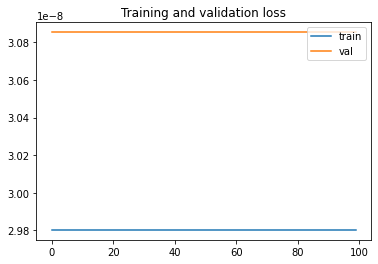

In [122]:
epochs = range(len(training_history.history['loss'])) # Get number of epochs

# plot loss learning curves
plt.plot  (epochs, training_history.history['loss'], label = 'train')
plt.plot  (epochs, training_history.history['val_loss'], label = 'val')
plt.legend(loc = 'upper right')
plt.title ('Training and validation loss')

In [123]:
# define the model
param = 1e-4
def batchnorm_model():
    model1 = Sequential()
    model1.add(Dense(50, input_dim=X_train.shape[1], activation='relu'))
    model1.add(Dense(100, activation='relu'))
    model1.add(BatchNormalization())
    model1.add(Dropout(0.2))

    model1.add(Dense(150, activation='relu'))
    model1.add(BatchNormalization())
    model1.add(Dropout(0.2))
    model1.add(Dense(40, activation='relu'))
    model1.add(BatchNormalization())
    model1.add(Dropout(0.2))
    model1.add(Dense(1, activation='softmax'))

    # compile the keras model
    opt = optimizers.Adam(lr=1e-3)
    # opt = optimizers.SGD(lr=0.001, momentum=0.9)
    model1.compile(loss='categorical_crossentropy', optimizer=opt, metrics=['accuracy'])
    
    return model1

In [124]:
model_bat = batchnorm_model()
# Use earlystopping
callback = tf.keras.callbacks.EarlyStopping(monitor='loss', patience=5, min_delta=0.001)
rlrp = ReduceLROnPlateau(monitor='val_loss', factor=0.0001, patience=5, min_delta=1E-4)

target_type = 'multi_label'
metrics = Metrics(validation_data=(X_train_glv, y_train_glv, target_type))

# fit the keras model on the dataset
training_history = model_bat.fit(X_train_glv, y_train_glv, epochs=100, batch_size=8, verbose=1, validation_data=(X_test_glv, y_test_glv), callbacks=[rlrp,metrics])

Epoch 1/100
43/43 [==============================] - 2s 16ms/step - loss: 0.0000e+00 - accuracy: 0.0735 - val_loss: 0.0000e+00 - val_accuracy: 0.0706 - lr: 0.0010
Epoch 2/100
43/43 [==============================] - 0s 6ms/step - loss: 0.0000e+00 - accuracy: 0.0735 - val_loss: 0.0000e+00 - val_accuracy: 0.0706 - lr: 0.0010
Epoch 3/100
43/43 [==============================] - 0s 7ms/step - loss: 0.0000e+00 - accuracy: 0.0735 - val_loss: 0.0000e+00 - val_accuracy: 0.0706 - lr: 0.0010
Epoch 4/100
43/43 [==============================] - 0s 7ms/step - loss: 0.0000e+00 - accuracy: 0.0735 - val_loss: 0.0000e+00 - val_accuracy: 0.0706 - lr: 0.0010
Epoch 5/100
43/43 [==============================] - 0s 8ms/step - loss: 0.0000e+00 - accuracy: 0.0735 - val_loss: 0.0000e+00 - val_accuracy: 0.0706 - lr: 0.0010
Epoch 6/100
43/43 [==============================] - 0s 7ms/step - loss: 0.0000e+00 - accuracy: 0.0735 - val_loss: 0.0000e+00 - val_accuracy: 0.0706 - lr: 0.0010
Epoch 7/100
43/43 [========

In [125]:
_, train_accuracy = model_bat.evaluate(X_train_glv, y_train_glv, batch_size=8, verbose=0)
_, test_accuracy = model_bat.evaluate(X_test_glv, y_test_glv, batch_size=8, verbose=0)

print('Train accuracy: %.2f' % (train_accuracy*100))
print('Test accuracy: %.2f' % (test_accuracy*100))

Train accuracy: 7.35
Test accuracy: 7.06


In [126]:
accuracy, precision, recall, f1 = get_classification_metrics(model_bat, X_test_glv, y_test_glv, target_type)
print('Accuracy: %f' % accuracy)
print('Precision: %f' % precision)
print('Recall: %f' % recall)
print('F1 score: %f' % f1)

Accuracy: 0.070588
Precision: 0.070588
Recall: 0.070588
F1 score: 0.070588


### Design, train and test RNN or LSTM classifiers

Creating a Model with Text Inputs Only

In [127]:
X_text = industry_data['Cleaned_Description']
y_text = ind_feature_data['AccidentLevel_grp']

In [128]:
# Encode labels in column 'Accident Level'.
y_text = LabelEncoder().fit_transform(y_text)

In [129]:
# Divide our data into testing and training sets:
X_text_train, X_text_test, y_text_train, y_text_test = train_test_split(X_text, y_text, test_size = 0.20, random_state = 1, stratify = y_text)

In [130]:
print('X_text_train shape : ({0})'.format(X_text_train.shape))
print('y_text_train shape : ({0},)'.format(y_text_train.shape))
print('X_text_test shape : ({0})'.format(X_text_test.shape))
print('y_text_test shape : ({0},)'.format(y_text_test.shape))

X_text_train shape : ((340,))
y_text_train shape : ((340,),)
X_text_test shape : ((85,))
y_text_test shape : ((85,),)


In [131]:
# Convert both the training and test labels into one-hot encoded vectors:
y_text_train = np_utils.to_categorical(y_text_train)
y_text_test = np_utils.to_categorical(y_text_test)

In [132]:
# The first step in word embeddings is to convert the words into thier corresponding numeric indexes.
tokenizer = Tokenizer(num_words=5000)
tokenizer.fit_on_texts(X_text_train)

X_text_train = tokenizer.texts_to_sequences(X_text_train)
X_text_test = tokenizer.texts_to_sequences(X_text_test)

In [133]:
# Sentences can have different lengths, and therefore the sequences returned by the Tokenizer class also consist of variable lengths.
# We need to pad the our sequences using the max length.
vocab_size = len(tokenizer.word_index) + 1
print("vocab_size:", vocab_size)

maxlen = 100

X_text_train = pad_sequences(X_text_train, padding='post', maxlen=maxlen)
X_text_test = pad_sequences(X_text_test, padding='post', maxlen=maxlen)

vocab_size: 2839


In [134]:
# We need to load the built-in GloVe word embeddings
embedding_size = 200
embeddings_dictionary = dict()

glove_file = open('glove.6B.200d.txt', encoding="utf8")

for line in glove_file:
    records = line.split()
    word = records[0]
    vector_dimensions = np.asarray(records[1:], dtype='float32')
    embeddings_dictionary[word] = vector_dimensions

glove_file.close()

embedding_matrix = np.zeros((vocab_size, embedding_size))

for word, index in tokenizer.word_index.items():
    embedding_vector = embeddings_dictionary.get(word)
    if embedding_vector is not None:
        embedding_matrix[index] = embedding_vector

len(embeddings_dictionary.values())

400000

In [135]:
def lstm_model():
    deep_inputs = Input(shape=(maxlen,))
    embedding_layer = Embedding(vocab_size, embedding_size, weights=[embedding_matrix], trainable=False)(deep_inputs)

    LSTM_Layer_1 = Bidirectional(LSTM(128, return_sequences = True))(embedding_layer)
    max_pool_layer_1 = GlobalMaxPool1D()(LSTM_Layer_1)
    drop_out_layer_1 = Dropout(0.5, input_shape = (256,))(max_pool_layer_1)
    dense_layer_1 = Dense(128, activation = 'relu')(drop_out_layer_1)
    drop_out_layer_2 = Dropout(0.5, input_shape = (128,))(dense_layer_1)
    dense_layer_2 = Dense(64, activation = 'relu')(drop_out_layer_2)
    drop_out_layer_3 = Dropout(0.5, input_shape = (64,))(dense_layer_2)

    dense_layer_3 = Dense(32, activation = 'relu')(drop_out_layer_3)
    drop_out_layer_4 = Dropout(0.5, input_shape = (32,))(dense_layer_3)

    dense_layer_4 = Dense(10, activation = 'relu')(drop_out_layer_4)
    drop_out_layer_5 = Dropout(0.5, input_shape = (10,))(dense_layer_4)

    dense_layer_5 = Dense(3, activation='softmax')(drop_out_layer_5)
    # dense_layer_3 = Dense(5, activation='softmax')(drop_out_layer_3)

    # LSTM_Layer_1 = LSTM(128)(embedding_layer)
    # dense_layer_1 = Dense(5, activation='softmax')(LSTM_Layer_1)
    # model = Model(inputs=deep_inputs, outputs=dense_layer_1)

    modellstm = Model(inputs=deep_inputs, outputs=dense_layer_5)
    #model = Model(inputs=deep_inputs, outputs=dense_layer_3)

    opt = optimizers.SGD(lr=0.001, momentum=0.9)
    modellstm.compile(loss='categorical_crossentropy', optimizer=opt, metrics=['acc'])
    
    return modellstm

In [136]:
modellstm = lstm_model()
print(modellstm.summary())

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 100)]             0         
                                                                 
 embedding (Embedding)       (None, 100, 200)          567800    
                                                                 
 bidirectional (Bidirectiona  (None, 100, 256)         336896    
 l)                                                              
                                                                 
 global_max_pooling1d (Globa  (None, 256)              0         
 lMaxPooling1D)                                                  
                                                                 
 dropout_3 (Dropout)         (None, 256)               0         
                                                                 
 dense_10 (Dense)            (None, 128)               32896 

In [137]:
# Use earlystopping
callback = tf.keras.callbacks.EarlyStopping(monitor='loss', patience=7, min_delta=1E-3)
rlrp = ReduceLROnPlateau(monitor='val_loss', factor=0.0001, patience=5, min_delta=1E-4)

# # fit the keras model on the dataset
# training_history = modellstm.fit(X_text_train, y_text_train, epochs=100, batch_size=8, verbose=1, validation_data=(X_text_test, y_text_test), callbacks=[rlrp])

target_type = 'multi_label'
metrics = Metrics(validation_data=(X_text_train, y_text_train, target_type))

# fit the keras model on the dataset
training_history = modellstm.fit(X_text_train, y_text_train, epochs=100, batch_size=8, verbose=1, validation_data=(X_text_test, y_text_test), callbacks=[rlrp, metrics])

Epoch 1/100
43/43 [==============================] - 14s 249ms/step - loss: 1.0863 - acc: 0.5059 - val_loss: 0.9716 - val_acc: 0.8353 - lr: 0.0010
Epoch 2/100
43/43 [==============================] - 10s 226ms/step - loss: 0.8577 - acc: 0.7588 - val_loss: 0.7981 - val_acc: 0.8353 - lr: 0.0010
Epoch 3/100
43/43 [==============================] - 10s 241ms/step - loss: 0.7838 - acc: 0.8324 - val_loss: 0.7030 - val_acc: 0.8353 - lr: 0.0010
Epoch 4/100
43/43 [==============================] - 9s 211ms/step - loss: 0.7100 - acc: 0.8265 - val_loss: 0.6537 - val_acc: 0.8353 - lr: 0.0010
Epoch 5/100
43/43 [==============================] - 9s 212ms/step - loss: 0.6675 - acc: 0.8382 - val_loss: 0.6342 - val_acc: 0.8353 - lr: 0.0010
Epoch 6/100
43/43 [==============================] - 9s 210ms/step - loss: 0.6264 - acc: 0.8353 - val_loss: 0.6064 - val_acc: 0.8353 - lr: 0.0010
Epoch 7/100
43/43 [==============================] - 9s 217ms/step - loss: 0.6433 - acc: 0.8382 - val_loss: 0.5914 - val_

In [138]:
# evaluate the keras model
_, train_accuracy = modellstm.evaluate(X_text_train, y_text_train, batch_size=8, verbose=0)
_, test_accuracy = modellstm.evaluate(X_text_test, y_text_test, batch_size=8, verbose=0)

print('Train accuracy: %.2f' % (train_accuracy*100))
print('Test accuracy: %.2f' % (test_accuracy*100))

Train accuracy: 83.82
Test accuracy: 83.53


In [139]:
accuracy, precision, recall, f1 = get_classification_metrics(modellstm, X_text_test, y_text_test, target_type)
print('Accuracy: %f' % accuracy)
print('Precision: %f' % precision)
print('Recall: %f' % recall)
print('F1 score: %f' % f1)

Accuracy: 0.835294
Precision: 0.835294
Recall: 0.835294
F1 score: 0.835294


Creating a Model with Categorical features Only

In [140]:
# Select input and output features
X_cat = ind_feature_data.drop(['AccidentLevel_grp','Potential Accident Level'], axis = 1)
y_cat = ind_feature_data['AccidentLevel_grp']

In [141]:
# Encode labels in column 'Accident Level'.
y_cat = LabelEncoder().fit_transform(y_cat)

In [142]:
# Divide our data into testing and training sets:
X_cat_train, X_cat_test, y_cat_train, y_cat_test = train_test_split(X_cat, y_cat, test_size = 0.20, random_state = 1, stratify = y_cat)

print('X_cat_train shape : ({0})'.format(X_cat_train.shape[0]))
print('y_cat_train shape : ({0},)'.format(y_cat_train.shape[0]))
print('X_cat_test shape : ({0})'.format(X_cat_test.shape[0]))
print('y_cat_test shape : ({0},)'.format(y_cat_test.shape[0]))

X_cat_train shape : (340)
y_cat_train shape : (340,)
X_cat_test shape : (85)
y_cat_test shape : (85,)


In [143]:
# Convert both the training and test labels into one-hot encoded vectors:
y_cat_train = np_utils.to_categorical(y_cat_train)
y_cat_test = np_utils.to_categorical(y_cat_test)

In [144]:
# Variable transformation using StandardScaler
scaler_X = StandardScaler() #StandardScaler()
X_cat_train.iloc[:,:6] = scaler_X.fit_transform(X_cat_train.iloc[:,:6]) # Scaling only first 6 feautres

X_cat_test.iloc[:,:6] = scaler_X.fit_transform(X_cat_test.iloc[:,:6]) # Scaling only first 6 feautres


In [145]:
# fix random seed for reproducibility
def all_cat_model():
  # reset_random_seeds()

  #param = 1e-9
  param = 1e-4

  input2 = Input(shape=(X_cat_train.shape[1],))
  dense_layer_1 = Dense(10, input_dim=X_cat_train.shape[1], activation='relu', kernel_initializer='he_uniform', kernel_regularizer=l2(param),
                  kernel_constraint=unit_norm())(input2)
  drop_out_layer_1 = Dropout(0.2)(dense_layer_1)
  batch_norm_layer_1 = BatchNormalization()(drop_out_layer_1)
  dense_layer_2 = Dense(10, activation='relu', kernel_initializer='he_uniform', kernel_regularizer=l2(param), 
                  kernel_constraint=unit_norm())(batch_norm_layer_1)
  drop_out_layer_2 = Dropout(0.5)(dense_layer_2)
  batch_norm_layer_2 = BatchNormalization()(drop_out_layer_2)
  dense_layer_3 = Dense(3, activation='softmax', kernel_regularizer=l2(param), kernel_constraint=unit_norm())(batch_norm_layer_2)

  model_cat = Model(inputs=input2, outputs=dense_layer_3)

  # compile the keras model
  opt = optimizers.Adamax(lr=0.01)
  # opt = SGD(lr=0.001, momentum=0.9)
  model_cat.compile(loss='categorical_crossentropy', optimizer=opt, metrics=['acc'])
  return model_cat

In [146]:
all_cat_model = all_cat_model()
print(all_cat_model.summary())

Model: "model_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_2 (InputLayer)        [(None, 12)]              0         
                                                                 
 dense_15 (Dense)            (None, 10)                130       
                                                                 
 dropout_8 (Dropout)         (None, 10)                0         
                                                                 
 batch_normalization_3 (Batc  (None, 10)               40        
 hNormalization)                                                 
                                                                 
 dense_16 (Dense)            (None, 10)                110       
                                                                 
 dropout_9 (Dropout)         (None, 10)                0         
                                                           

In [147]:
callback = tf.keras.callbacks.EarlyStopping(monitor='loss', patience=7, min_delta=1E-3)
rlrp = ReduceLROnPlateau(monitor='val_loss', factor=0.0001, patience=5, min_delta=1E-4)

target_type = 'multi_label'
metrics = Metrics(validation_data=(X_cat_train, y_cat_train, target_type))

# fit the keras model on the dataset
training_history = all_cat_model.fit(X_cat_train, y_cat_train, epochs=100, batch_size=8, verbose=1, validation_data=(X_cat_test, y_cat_test), callbacks=[rlrp])

Epoch 1/100
43/43 [==============================] - 1s 8ms/step - loss: 0.9691 - acc: 0.6088 - val_loss: 2.4191 - val_acc: 0.0941 - lr: 0.0100
Epoch 2/100
43/43 [==============================] - 0s 3ms/step - loss: 0.6721 - acc: 0.7824 - val_loss: 0.7056 - val_acc: 0.8235 - lr: 0.0100
Epoch 3/100
43/43 [==============================] - 0s 4ms/step - loss: 0.6143 - acc: 0.8235 - val_loss: 0.5719 - val_acc: 0.8353 - lr: 0.0100
Epoch 4/100
43/43 [==============================] - 0s 3ms/step - loss: 0.6220 - acc: 0.8206 - val_loss: 0.5840 - val_acc: 0.8353 - lr: 0.0100
Epoch 5/100
43/43 [==============================] - 0s 3ms/step - loss: 0.6421 - acc: 0.8206 - val_loss: 0.5801 - val_acc: 0.8353 - lr: 0.0100
Epoch 6/100
43/43 [==============================] - 0s 3ms/step - loss: 0.6199 - acc: 0.8353 - val_loss: 0.5788 - val_acc: 0.8353 - lr: 0.0100
Epoch 7/100
43/43 [==============================] - 0s 3ms/step - loss: 0.5781 - acc: 0.8382 - val_loss: 0.5785 - val_acc: 0.8353 - lr:

In [148]:
# evaluate the keras model
_, train_accuracy = all_cat_model.evaluate(X_cat_train, y_cat_train, batch_size=8, verbose=0)
_, test_accuracy = all_cat_model.evaluate(X_cat_test, y_cat_test, batch_size=8, verbose=0)

print('Train accuracy: %.2f' % (train_accuracy*100))
print('Test accuracy: %.2f' % (test_accuracy*100))

Train accuracy: 83.82
Test accuracy: 83.53


In [149]:
accuracy, precision, recall, f1 = get_classification_metrics(all_cat_model, X_cat_test, y_cat_test, target_type)
print('Accuracy: %f' % accuracy)
print('Precision: %f' % precision)
print('Recall: %f' % recall)
print('F1 score: %f' % f1)

Accuracy: 0.835294
Precision: 0.835294
Recall: 0.835294
F1 score: 0.835294


Text(0.5, 1.0, 'Training and validation loss')

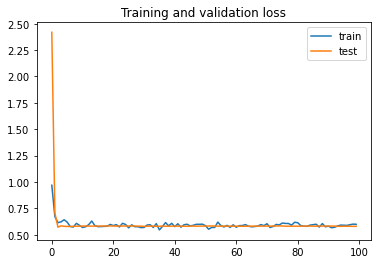

In [150]:
epochs = range(len(training_history.history['loss'])) # Get number of epochs

# plot loss learning curves
plt.plot(epochs, training_history.history['loss'], label = 'train')
plt.plot(epochs, training_history.history['val_loss'], label = 'test')
plt.legend(loc = 'upper right')
plt.title ('Training and validation loss')

Above one is good fit, it is identified by a training and validation loss that decreases to a point of stability with a minimal gap between the two final loss values. The loss of the model will almost always be lower on the training dataset than the validation dataset.

Text(0.5, 1.0, 'Training and validation accuracy')

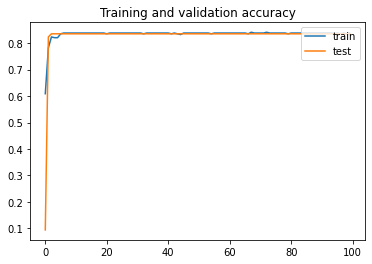

In [151]:
# plot accuracy learning curves
plt.plot(epochs, training_history.history['acc'], label = 'train')
plt.plot(epochs, training_history.history['val_acc'], label = 'test')
plt.legend(loc = 'upper right')
plt.title ('Training and validation accuracy')

We could see it accuracy continually rise during training. As expected, we see the learning curves for accuracy on the test dataset plateau, indicating that the model has no longer overfit the training dataset and it is generalized model.

In [152]:
# serialize model to JSON
model_json = modellstm.to_json()
with open("modellstm.json", "w") as json_file:
    json_file.write(model_json)
    
# serialize weights to HDF5
modellstm.save_weights("modellstm.h5")
print("Saved model weights to disk")

# Save the model in h5 format 
modellstm.save("model_lstm.h5")
print("Saved model to disk")

Saved model weights to disk
Saved model to disk


In [153]:
yhat = modellstm.predict(X_text_test, verbose=0)
print(yhat)

[[0.8174812  0.08673161 0.09578717]
 [0.8179911  0.08633318 0.09567581]
 [0.81766766 0.08675395 0.09557837]
 [0.8172386  0.08691708 0.09584425]
 [0.8186462  0.08562155 0.09573226]
 [0.81879926 0.08586505 0.09533576]
 [0.8182784  0.08608257 0.09563904]
 [0.8195401  0.08514963 0.09531035]
 [0.8173309  0.08682782 0.09584132]
 [0.8182769  0.08629717 0.0954259 ]
 [0.8179704  0.08648776 0.09554182]
 [0.81865567 0.0859353  0.09540901]
 [0.8177556  0.08636636 0.09587798]
 [0.81760126 0.08666147 0.09573725]
 [0.81981564 0.08493426 0.09525   ]
 [0.8172176  0.08700407 0.09577833]
 [0.8182081  0.0858333  0.09595864]
 [0.8168746  0.08715083 0.09597451]
 [0.8176601  0.08648341 0.09585652]
 [0.8187622  0.08566799 0.09556984]
 [0.8174337  0.08684207 0.0957242 ]
 [0.8161745  0.08775725 0.09606826]
 [0.8189643  0.08552592 0.0955098 ]
 [0.8194267  0.08501645 0.09555681]
 [0.8179324  0.08635941 0.0957081 ]
 [0.82018965 0.08470692 0.09510341]
 [0.8167014  0.08736068 0.09593794]
 [0.817868   0.08641487 0.09

In [154]:
def predict(msg):
  data = " ".join(text_cleaning(msg))

  #vectorizing the tweet by the pre-fitted tokenizer instance
  data = tokenizer.texts_to_sequences(data)
  #padding the tweet to have exactly the same shape as `embedding_2` input
  data = pad_sequences(data, maxlen=100, dtype='int32', value=0)
  # print(data)
  ypred = modellstm.predict(data,batch_size=1,verbose = 2)[0]
  return ypred
# msg = ('injury in the left hand')
# predict(msg)
  # print(sequence_to)
  print(ypred)

In [155]:
msg = ('During the activation of a sodium sulphide pump,')
result=predict(msg)
result

31/31 - 1s - 1s/epoch - 40ms/step


array([0.8233055 , 0.08259055, 0.09410391], dtype=float32)

In [156]:
class_label=np.argmax(result)
if class_label == 0:
  print('AccidentLevelI')
elif class_label == 1:
  print('AccidentLevelII')
else:
  print('AccidentLevel1II')


AccidentLevelI


Creating a Model with Multiple Inputs

In [157]:
def model_text_cat():

  input_1 = Input(shape=(maxlen,))
  embedding_layer   = Embedding(vocab_size, embedding_size, weights=[embedding_matrix], trainable=False)(input_1)
  LSTM_Layer_1      = Bidirectional(LSTM(128, return_sequences = True))(embedding_layer)
  max_pool_layer_1  = GlobalMaxPool1D()(LSTM_Layer_1)
  drop_out_layer_1  = Dropout(0.5, input_shape = (256,))(max_pool_layer_1)
  dense_layer_1     = Dense(128, activation = 'relu')(drop_out_layer_1)
  drop_out_layer_2  = Dropout(0.5, input_shape = (128,))(dense_layer_1)
  dense_layer_2     = Dense(64, activation = 'relu')(drop_out_layer_2)
  drop_out_layer_3  = Dropout(0.5, input_shape = (64,))(dense_layer_2)

  dense_layer_3     = Dense(32, activation = 'relu')(drop_out_layer_3)
  drop_out_layer_4  = Dropout(0.5, input_shape = (32,))(dense_layer_3)

  dense_layer_4     = Dense(10, activation = 'relu')(drop_out_layer_4)
  drop_out_layer_5 = Dropout(0.5, input_shape = (10,))(dense_layer_4)

  #-------------------------------------------------------------------------------
  param = 1e-4

  input_2 = Input(shape=(X_cat_train.shape[1],))
  dense_layer_5       = Dense(10, input_dim=X_cat_train.shape[1], activation='relu', kernel_initializer='he_uniform', kernel_regularizer=l2(param),
                        kernel_constraint=unit_norm())(input_2)
  drop_out_layer_6    = Dropout(0.2)(dense_layer_5)
  batch_norm_layer_1  = BatchNormalization()(drop_out_layer_6)
  dense_layer_6       = Dense(10, activation='relu', kernel_initializer='he_uniform', kernel_regularizer=l2(param), 
                              kernel_constraint=unit_norm())(batch_norm_layer_1)
  drop_out_layer_7   = Dropout(0.5)(dense_layer_6)
  batch_norm_layer_2 = BatchNormalization()(drop_out_layer_7)

  concat_layer        = Concatenate()([drop_out_layer_5, batch_norm_layer_2])
  dense_layer_7       = Dense(10, activation='relu')(concat_layer)
  output  = Dense(3, activation='softmax')(dense_layer_7)
  modelcattext   = Model(inputs=[input_1, input_2], outputs=output)

  # compile the keras model
  #opt = optimizers.Adamax(lr=0.01)
  opt = optimizers.SGD(lr=0.001, momentum=0.9)
  modelcattext.compile(loss='categorical_crossentropy', optimizer=opt, metrics=['acc'])
  return modelcattext

In [158]:
text_cat_model = model_text_cat()
print(text_cat_model.summary())

Model: "model_2"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_3 (InputLayer)           [(None, 100)]        0           []                               
                                                                                                  
 embedding_1 (Embedding)        (None, 100, 200)     567800      ['input_3[0][0]']                
                                                                                                  
 bidirectional_1 (Bidirectional  (None, 100, 256)    336896      ['embedding_1[0][0]']            
 )                                                                                                
                                                                                                  
 global_max_pooling1d_1 (Global  (None, 256)         0           ['bidirectional_1[0][0]']  

In [159]:
# Use earlystopping
callback = tf.keras.callbacks.EarlyStopping(monitor='loss', patience=7, min_delta=1E-3)
rlrp = ReduceLROnPlateau(monitor='val_loss', factor=0.0001, patience=5, min_delta=1E-4)

target_type = 'multi_label'
metrics = Metrics(validation_data=([X_text_train, X_cat_train], y_cat_train, target_type))

# fit the keras model on the dataset
training_history = text_cat_model.fit([X_text_train, X_cat_train], y_cat_train, epochs=100, batch_size=8, verbose=1, validation_data=([X_text_test, X_cat_test], y_cat_test), callbacks=[rlrp, metrics])

Epoch 1/100
43/43 [==============================] - 17s 278ms/step - loss: 0.7896 - acc: 0.7735 - val_loss: 0.7427 - val_acc: 0.8353 - lr: 0.0010
Epoch 2/100
43/43 [==============================] - 9s 218ms/step - loss: 0.6656 - acc: 0.8147 - val_loss: 0.7608 - val_acc: 0.8353 - lr: 0.0010
Epoch 3/100
43/43 [==============================] - 10s 225ms/step - loss: 0.6879 - acc: 0.8324 - val_loss: 0.6801 - val_acc: 0.8353 - lr: 0.0010
Epoch 4/100
43/43 [==============================] - 9s 221ms/step - loss: 0.6273 - acc: 0.8353 - val_loss: 0.6063 - val_acc: 0.8353 - lr: 0.0010
Epoch 5/100
43/43 [==============================] - 10s 224ms/step - loss: 0.6416 - acc: 0.8353 - val_loss: 0.5952 - val_acc: 0.8353 - lr: 0.0010
Epoch 6/100
43/43 [==============================] - 10s 227ms/step - loss: 0.6069 - acc: 0.8382 - val_loss: 0.6282 - val_acc: 0.8353 - lr: 0.0010
Epoch 7/100
43/43 [==============================] - 9s 220ms/step - loss: 0.6349 - acc: 0.8382 - val_loss: 0.5955 - val

In [160]:
# evaluate the keras model
_, train_accuracy = text_cat_model.evaluate([X_text_train, X_cat_train], y_cat_train, batch_size=8, verbose=0)
_, test_accuracy = text_cat_model.evaluate([X_text_test, X_cat_test], y_cat_test, batch_size=8, verbose=0)

print('Train accuracy: %.2f' % (train_accuracy*100))
print('Test accuracy: %.2f' % (test_accuracy*100))

Train accuracy: 83.82
Test accuracy: 83.53


In [161]:
accuracy, precision, recall, f1 = get_classification_metrics(text_cat_model, [X_text_test, X_cat_test], y_cat_test, target_type)
print('Accuracy: %f' % accuracy)
print('Precision: %f' % precision)
print('Recall: %f' % recall)
print('F1 score: %f' % f1)

Accuracy: 0.835294
Precision: 0.835294
Recall: 0.835294
F1 score: 0.835294


Text(0.5, 1.0, 'Training and validation loss')

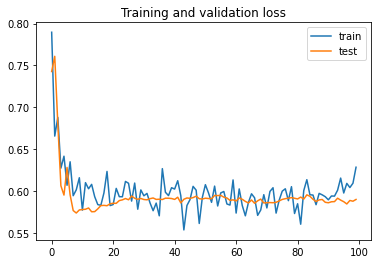

In [162]:
epochs = range(len(training_history.history['loss'])) # Get number of epochs

# plot loss learning curves
plt.plot(epochs, training_history.history['loss'], label = 'train')
plt.plot(epochs, training_history.history['val_loss'], label = 'test')
plt.legend(loc = 'upper right')
plt.title ('Training and validation loss')

Above one is good fit, it is identified by a training and validation loss that decreases to a point of stability with a minimal gap between the two final loss values. The loss of the model will almost always be lower on the training dataset than the validation dataset.

Text(0.5, 1.0, 'Training and validation accuracy')

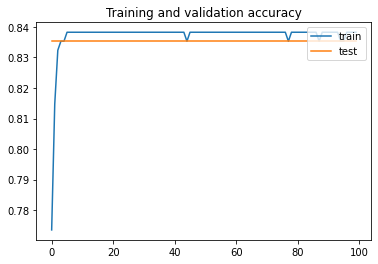

In [163]:
# plot accuracy learning curves
plt.plot(epochs, training_history.history['acc'], label = 'train')
plt.plot(epochs, training_history.history['val_acc'], label = 'test')
plt.legend(loc = 'upper right')
plt.title ('Training and validation accuracy')

We could see it accuracy continually rise during training. As expected, we see the learning curves for accuracy on the test dataset plateau, indicating that the model has no longer overfit the training dataset and it is generalized model.